#                                                                  Assignment 2 - Water Quality

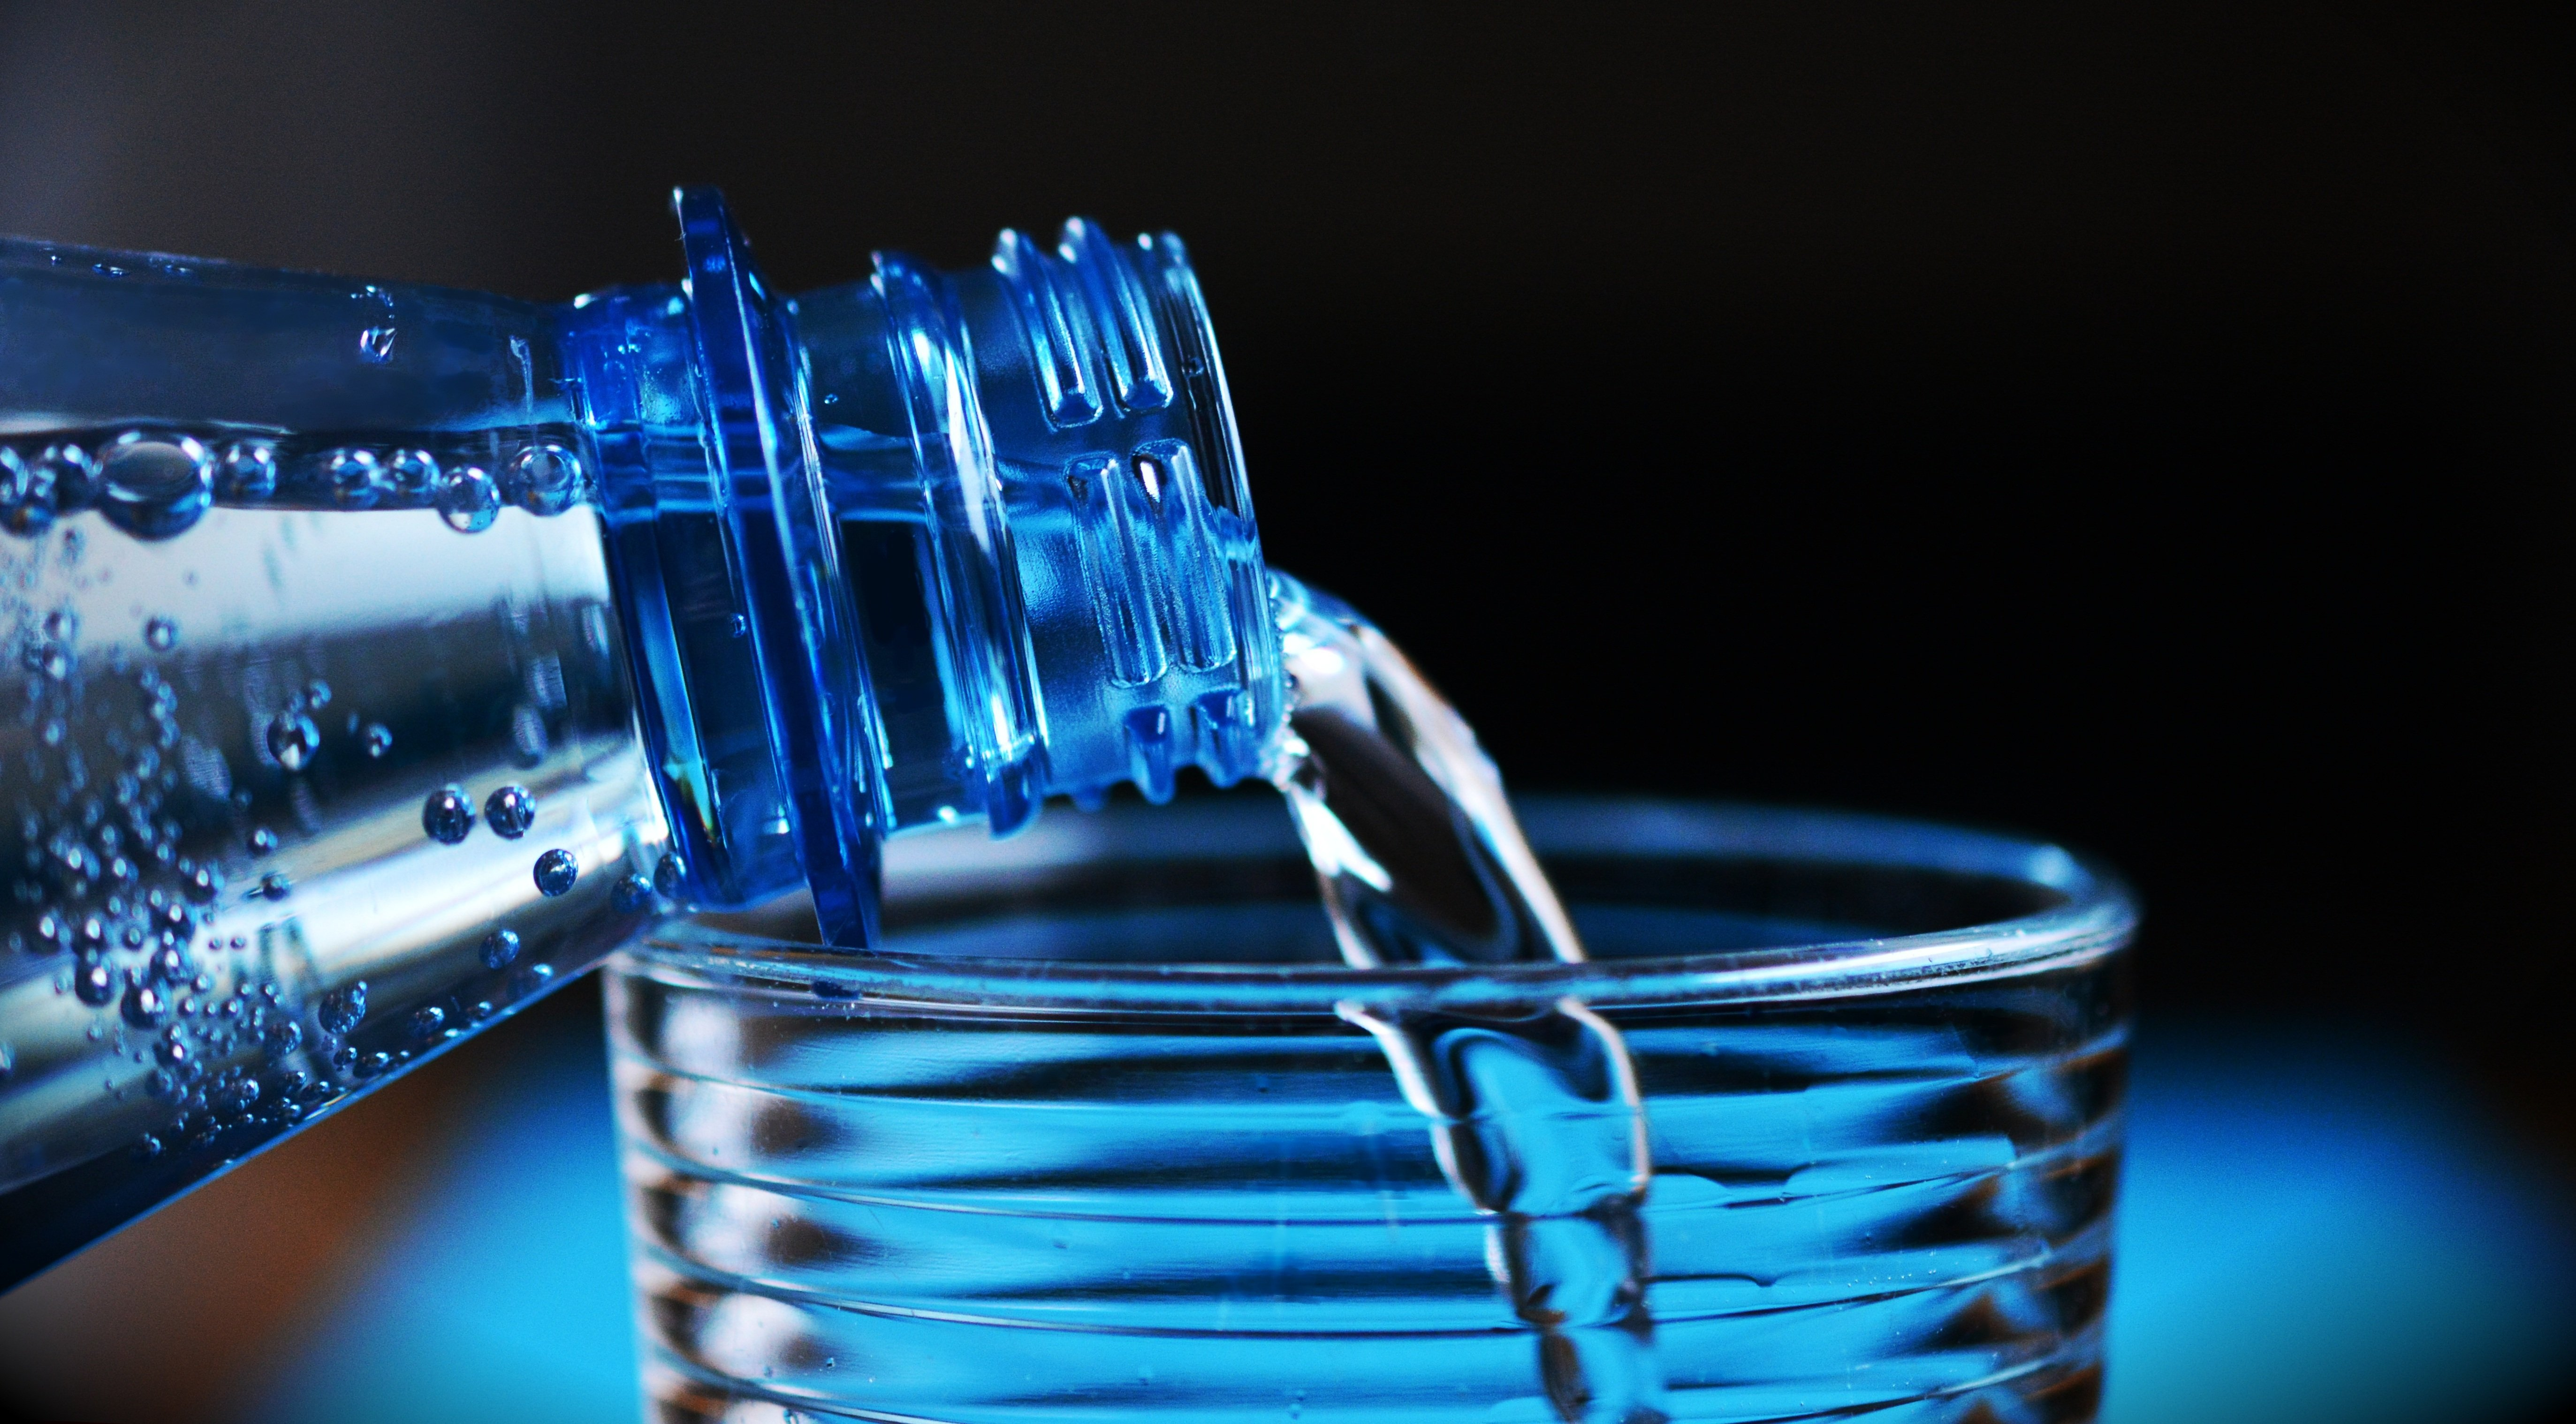

# Project Overview

Having a reliable source of clean water is essential for preserving the health of the public, recognizing a basic human right, and enforcing health safety measures. The provision of uncontaminated water is key to the progress of communities at all levels. It has been observed that in some regions, the economic benefits of investing in water and sanitation systems outweigh the investment costs due to reduced health risks and lower medical spending.

# Table of Contents

#### STEP I. Data Description.
* [ _A. Metadata of the dataset_](#Heading1)
#### STEP II. Importing Libraries and Loading Data.
* [ _A. Importing Libraries_](#Heading2)
* [ _B. Loading Data_](#Heading3)
#### STEP III. Understanding and Cleaning the Dataset
* [ _1. Data Types_](#Heading4)
* [ _2. Check for missing Values_](#Heading5)
* [ _3. Data Cleaning._](#Heading6)
* [ _4. Data Cleaning verification_](#Heading7)
#### STEP IV. Data Analysis
* [ _1. Descriptive Analysis_](#Heading8)
* [ _2. z Scores Analysis_](#Heading9)
* [ _3. Regression Analysis_](#Heading10)
#### STEP V. Data Visualisation
* [ _1. Pie chart Potability Distribution_](#Heading11)
* [ _2. Subplots_](#Heading12)
* [ _3. Correlation Matrix_](#Heading13)
* [ _4. Covariance Matrix_](#Heading14)
* [ _1. Plots and Pairplots_](#Heading15) 
#### STEP VI. Distribution and more of Data visualisation
* [_Histogram, boxplot, Boxplots, plot, KDE Graphs,..._](#Heading)
#### STEP VII. Reflection, Conclusion
Auth_or

# STEP I. Data Description. 

<a id='Heading1'></a>
## A. Metadata of the dataset:

__1.pH value:__
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

__2.Hardness:__
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

__3.Solids (Total dissolved solids - TDS):__
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

__4.Chloramines:__
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

__5.Sulfate:__
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

__6.Conductivity:__
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

__7.Organic_carbon:__
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

__8.Trihalomethanes:__
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

__9.Turbidity:__
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

__10.Potability:__
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


# STEP II. Importing Libraries and Loading Data

<a id='Heading1'></a>
### A. Importing Libraries 

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from IPython.display import Image 
from scipy import stats
from scipy.stats import gmean
from scipy.stats import kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_ind, f_oneway
warnings.filterwarnings('ignore')

### B. Loading Data

In [204]:
water_quality = pd.read_csv('water_potability.csv')
water_quality.head(10).style.hide(axis="index")

# STEP III. Understanding and Cleaning the Dataset

<a id='Heading4'></a>
#### _1. Data Types._

In [205]:
#Let's double check the data type found in our DataSet
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<a id='Heading5'></a>
#### _2. Check for missing Values._

In [206]:
# Get information about the missing values.
water_quality.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<a id='Heading6'></a>
#### _3. Data Cleaning._

In [207]:
# Let's clean our Data by handling missing value with average of features.
water_quality["ph"].fillna(water_quality["ph"].mean(skipna=True), inplace=True)
water_quality["Sulfate"].fillna(water_quality["Sulfate"].mean(skipna=True), inplace=True)
water_quality["Trihalomethanes"].fillna(water_quality["Trihalomethanes"].mean(skipna=True), inplace=True)


<a id='Heading7'></a>
#### _4. Data Cleaning verification_

In [208]:
# Let's check for missing values again to confirm that our dataset has been cleaned.
water_quality.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# STEP IV. Data Analysis

<a id='Heading8'></a>
#### _1. Descriptive Analysis_

In [209]:
# The Descriptive Analysis
n = water_quality.count()
mean_all = water_quality.mean()
median_all = water_quality.median()
geometric_mean_all = water_quality.apply(gmean)
mode_all = water_quality.apply(lambda x: x.value_counts().idxmax())
std_all = np.std(water_quality)
var_all = np.var(water_quality)
kurtosis_all = kurtosis(water_quality)
skewness_all = water_quality.apply(lambda x: np.sum(((x - x.mean()) / x.std())**3)) / n
range_all = water_quality.max() - water_quality.min()
min_all = water_quality.min()
max_all = water_quality.max()
sum_all = water_quality.sum()
count_all = water_quality.count()
cv_all = std_all / mean_all
q1 = water_quality.apply(lambda x: np.percentile(x, 25))
q3 = water_quality.apply(lambda x: np.percentile(x, 75))
q2 = water_quality.apply(lambda x: np.percentile(x, 50))
iqr_all = q3 - q1
mad_all = water_quality.apply(lambda x: np.mean(np.abs(x - x.mean())))
medad_all = water_quality.apply(lambda x: np.median(np.abs(x - x.median())))
qcd_all = (q3 - q1) / (q3 + q1)
p10 = water_quality.apply(lambda x: np.percentile(x, 10))
p90 = water_quality.apply(lambda x: np.percentile(x, 90))


summary_df = pd.DataFrame({'Mean': mean_all, 'Median': median_all,'Geometric mean': geometric_mean_all, 'Mode': mode_all, 'Standard Deviation': std_all,
                           'Sample Variance': var_all, 'Kurtosis': kurtosis_all, 'Skewness': skewness_all,
                           'Range': range_all, 'Minimum': min_all, 'Maximum': max_all, 'Sum': sum_all, 'Count': count_all,
                           
                            'First Quartile' : q1, 'Second Quartile' : q2, 'Third Quartile' : q3, 'Interquartile Range' : iqr_all,
                          'Mean Absolute Deviation' : mad_all, 'Median Absolute Deviation' : medad_all, 
                           'Quartile Coefficient of Dispersion' : qcd_all, 'Percentile 10' : p10, 'Percentile 90' : p90 })

summary_df_styled = summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('border', '1px solid white'), ('background-color', 'lightblue')]},
    {'selector': 'td', 'props': [('border', '1px solid white'), ('background-color', 'black')]},  # Making data cells yellow
    {'selector': 'th:first-child', 'props': [('background-color', 'orange')]},
    {'selector': 'th, td:first-child', 'props': [('background-color', 'green')]}
])

summary_df_styled


<a id='Heading9'></a>
#### _2. z Scores Analysis_

In [210]:
def z_scores(x):
    return (x - x.mean()) / x.std()

z_scores_all = water_quality.apply(z_scores)
z_scores_all.head(10).style.hide(axis="index")

# Applying the style
styled_df = z_scores_all.head(10).style.hide(axis="index") \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th, td',
         'props': [('border-bottom', '1px solid white')]},
        {'selector': 'th', 
         'props': [('text-align', 'center')]}
    ])
styled_df

<a id='Heading10'></a>
#### _3. Regression Analysis_

In [211]:
dependent_variable = 'Potability'
independent_variables = [variable for variable in water_quality.columns if variable != dependent_variable]

# Isolate the dependent variable and the predictors
predictors = water_quality[independent_variables]
response = water_quality[dependent_variable]

# Incorporate a constant into the predictors for the intercept
predictors_with_intercept = sm.add_constant(predictors)

# Construct and fit the linear regression model
fitted_model = sm.OLS(response, predictors_with_intercept).fit()

# Display the summary of the regression model
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Potability   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.177
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.305
Time:                        23:40:12   Log-Likelihood:                -2291.3
No. Observations:                3276   AIC:                             4603.
Df Residuals:                    3266   BIC:                             4664.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4716      0.146     

# STEP V. Data Visualisation

<a id='Heading11'></a>
#### _1. Pie chart Potability Distribution_

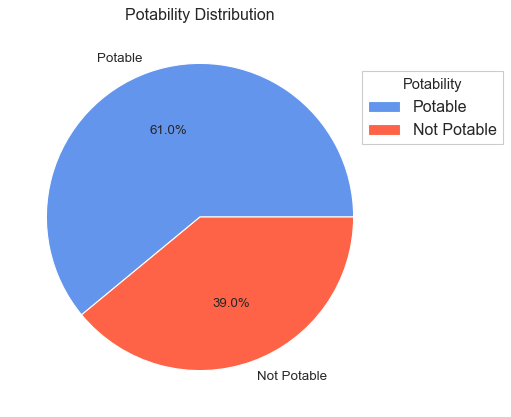

In [212]:
#Pie chart illustrating the distribution of potable versus non-potable water percentages
potability_counts = water_quality['Potability'].value_counts()
labels = ['Potable', 'Not Potable']

# Define your new color theme here
colors = ['#6495ED', '#FF6347']  # Cornflower Blue for Potable, Tomato for Not Potable

plt.pie(potability_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Potability Distribution')
# Add legend
plt.legend(title='Potability', loc='best', bbox_to_anchor=(0.9, 0.9))

plt.show()


<a id='Heading12'></a>
#### _2. Subplots_

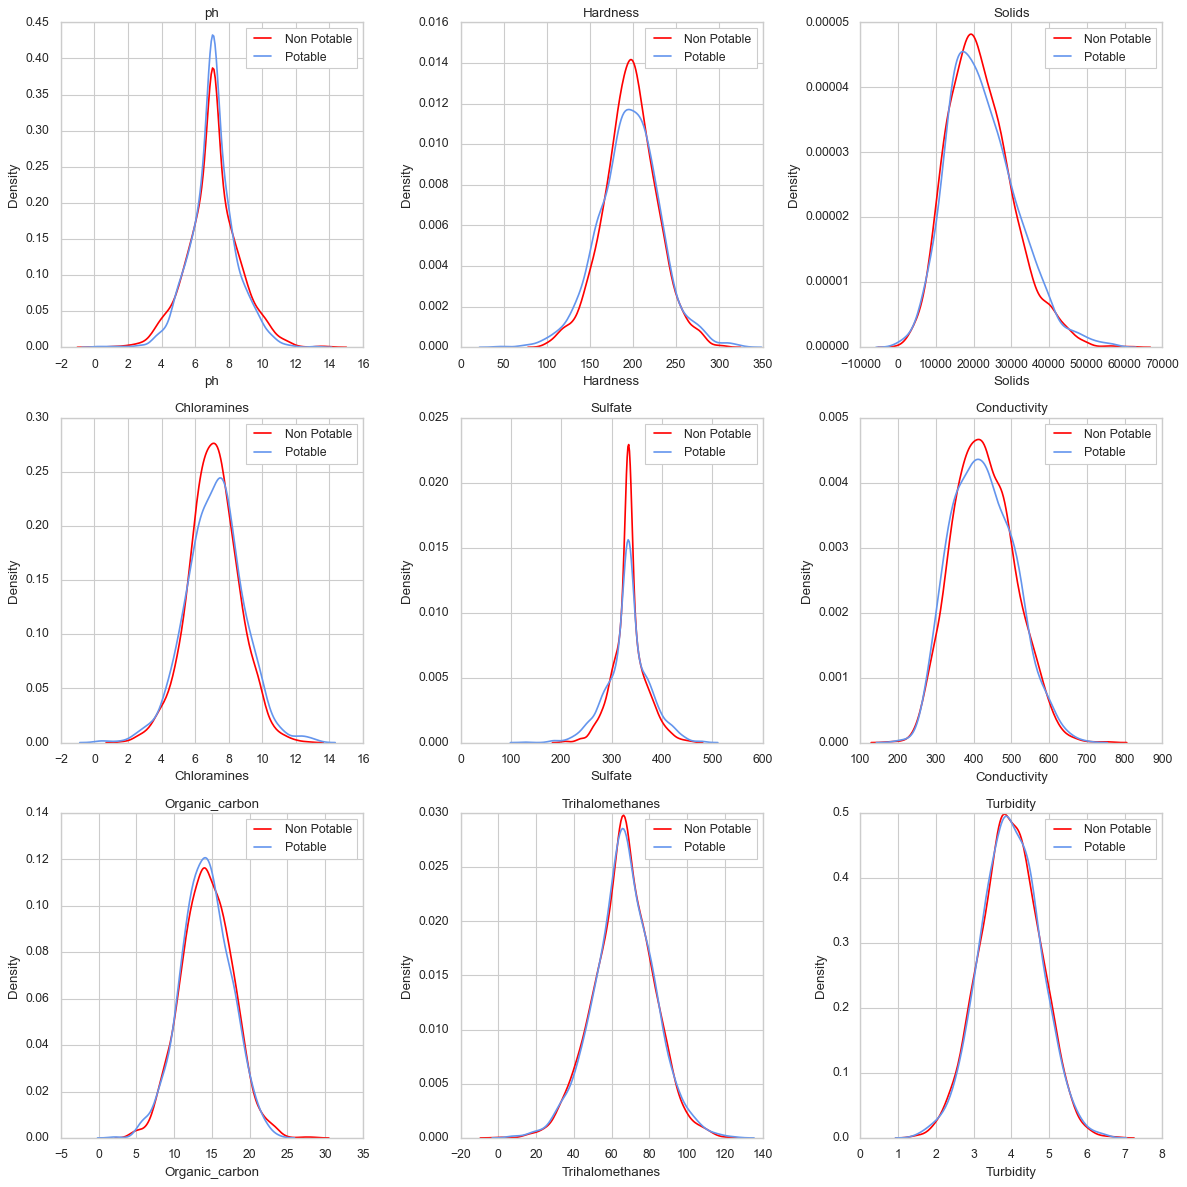

In [213]:
# Using the 'Potability' column
sns.set_theme(style="whitegrid")

non_potable = water_quality.query("Potability == 0")
potable = water_quality.query("Potability == 1")

plt.figure(figsize=(15, 15))

# Define colors for the plots
color_non_potable = 'red'
color_potable = '#6495ED'

for ax, col in enumerate(water_quality.columns[:9]):
    plt.subplot(3, 3, ax + 1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable", color=color_non_potable)
    sns.kdeplot(x=potable[col], label="Potable", color=color_potable)
    plt.legend()

plt.tight_layout()
plt.show()

<a id='heading13'></a>
#### _3. Correlation Matrix_

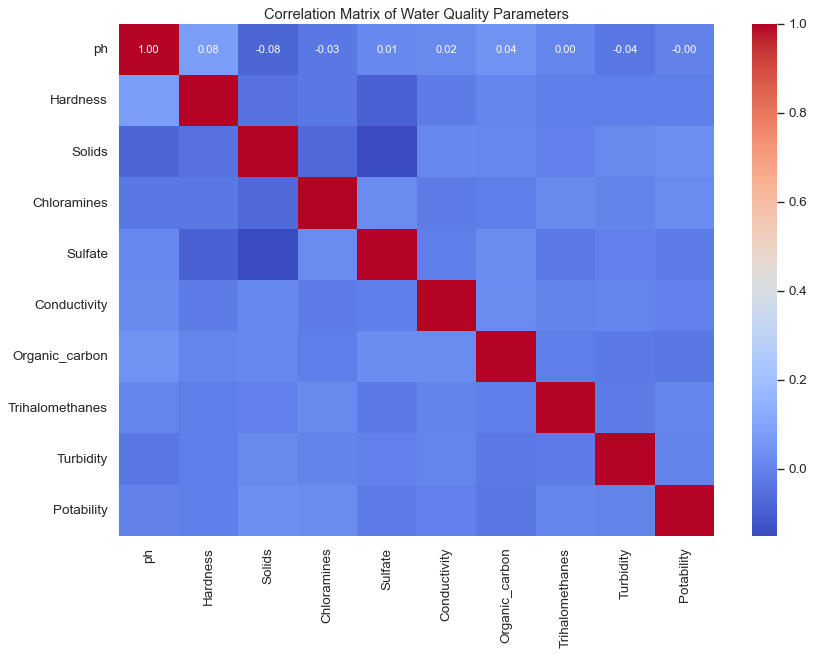

In [214]:
correlation_matrix = water_quality.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

<a id='Heading14'></a>
### _4. Covariance Matrix_

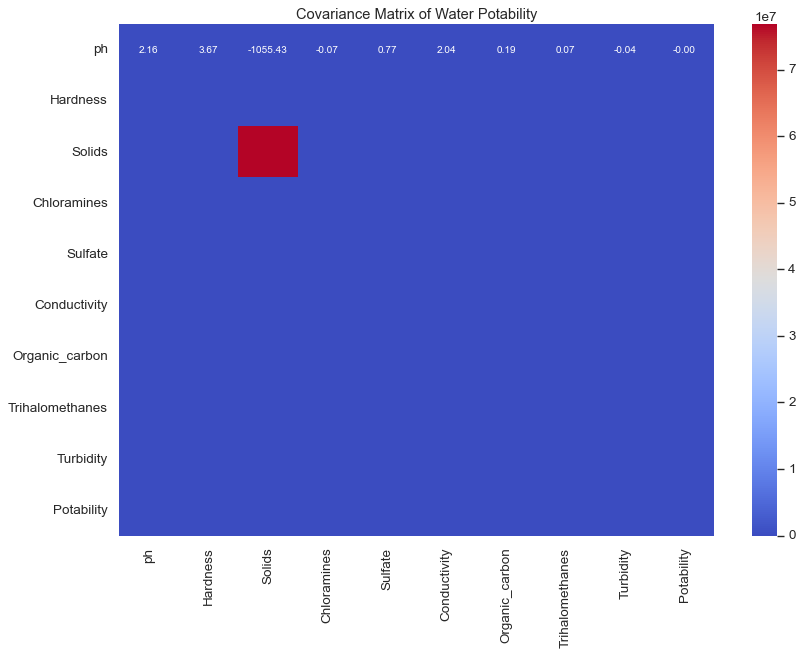

In [215]:
# Define a function to calculate the covariance between two columns
def covariance(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    n = len(x)

    return np.sum((x - x_mean) * (y - y_mean)) / (n - 1)

# Calculate the covariance matrix using the covariance function
covariance_matrix = water_quality.apply(lambda x: water_quality.apply(lambda y: covariance(x, y)))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 9})
plt.title('Covariance Matrix of Water Potability')
plt.show()

<a id='Heading15'></a>
### _5. Plots and Pairplots_

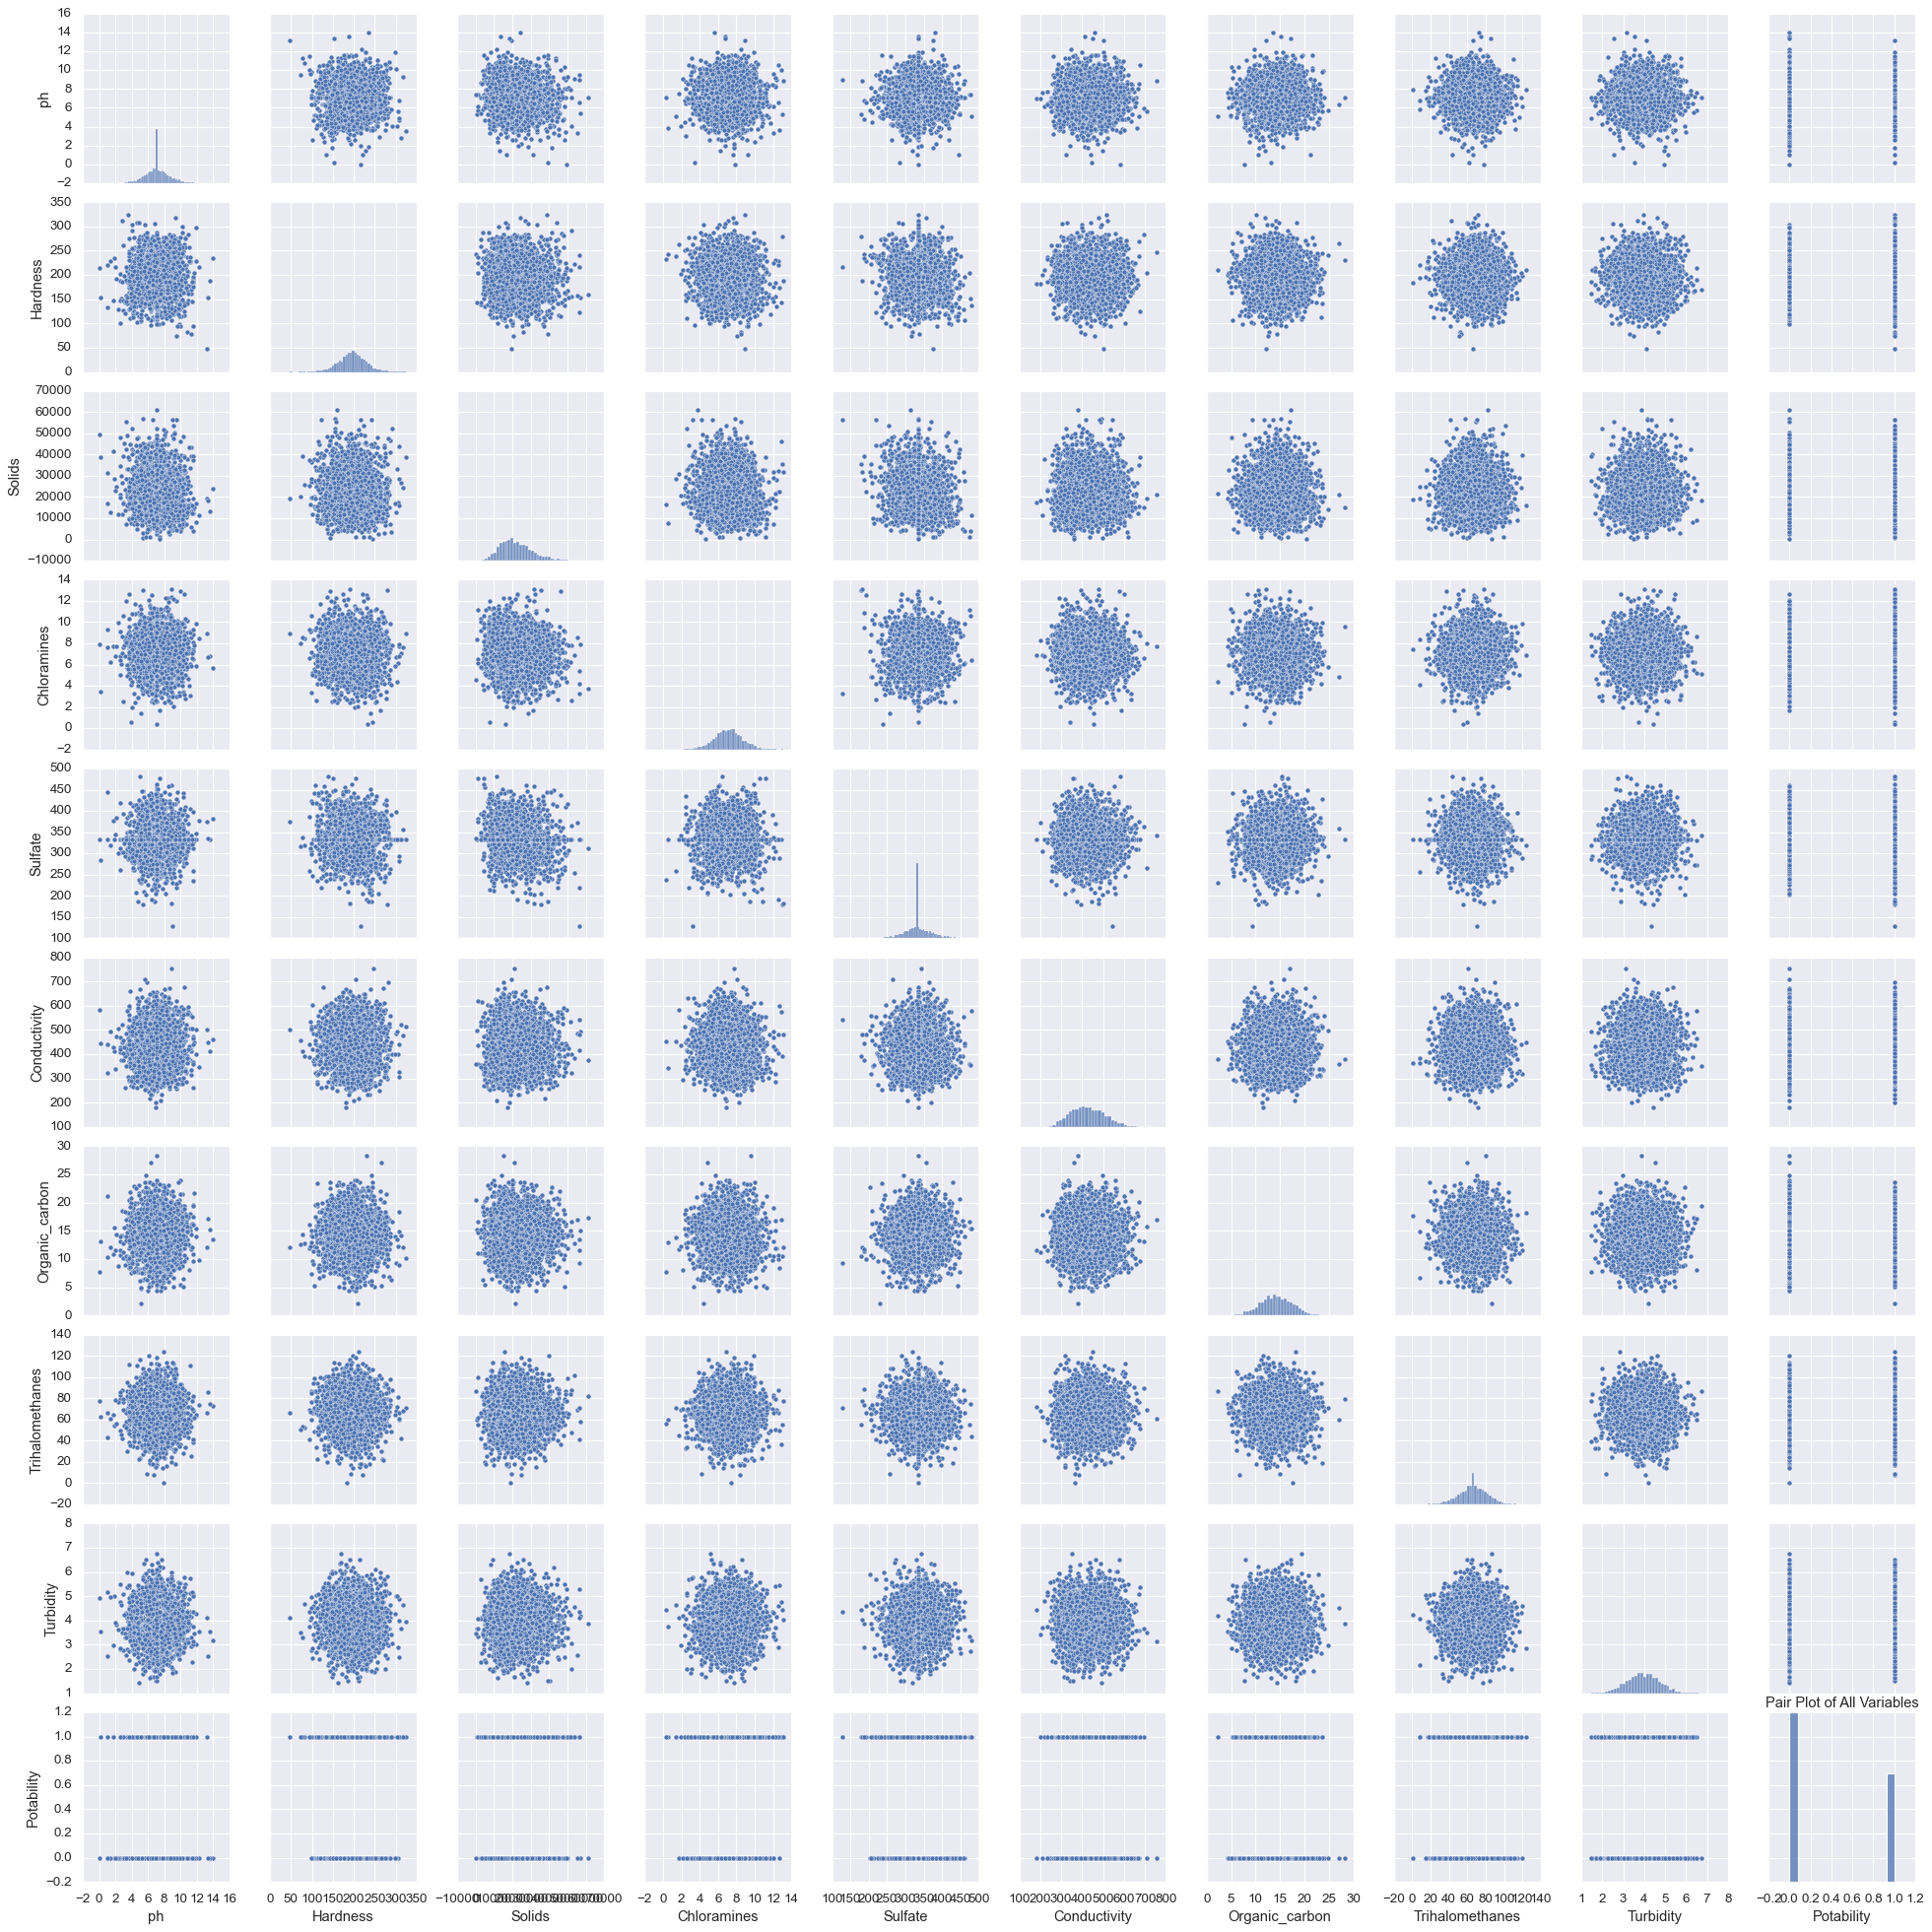

In [216]:
sns.pairplot(water_quality)
plt.title('Pair Plot of All Variables')
plt.show()

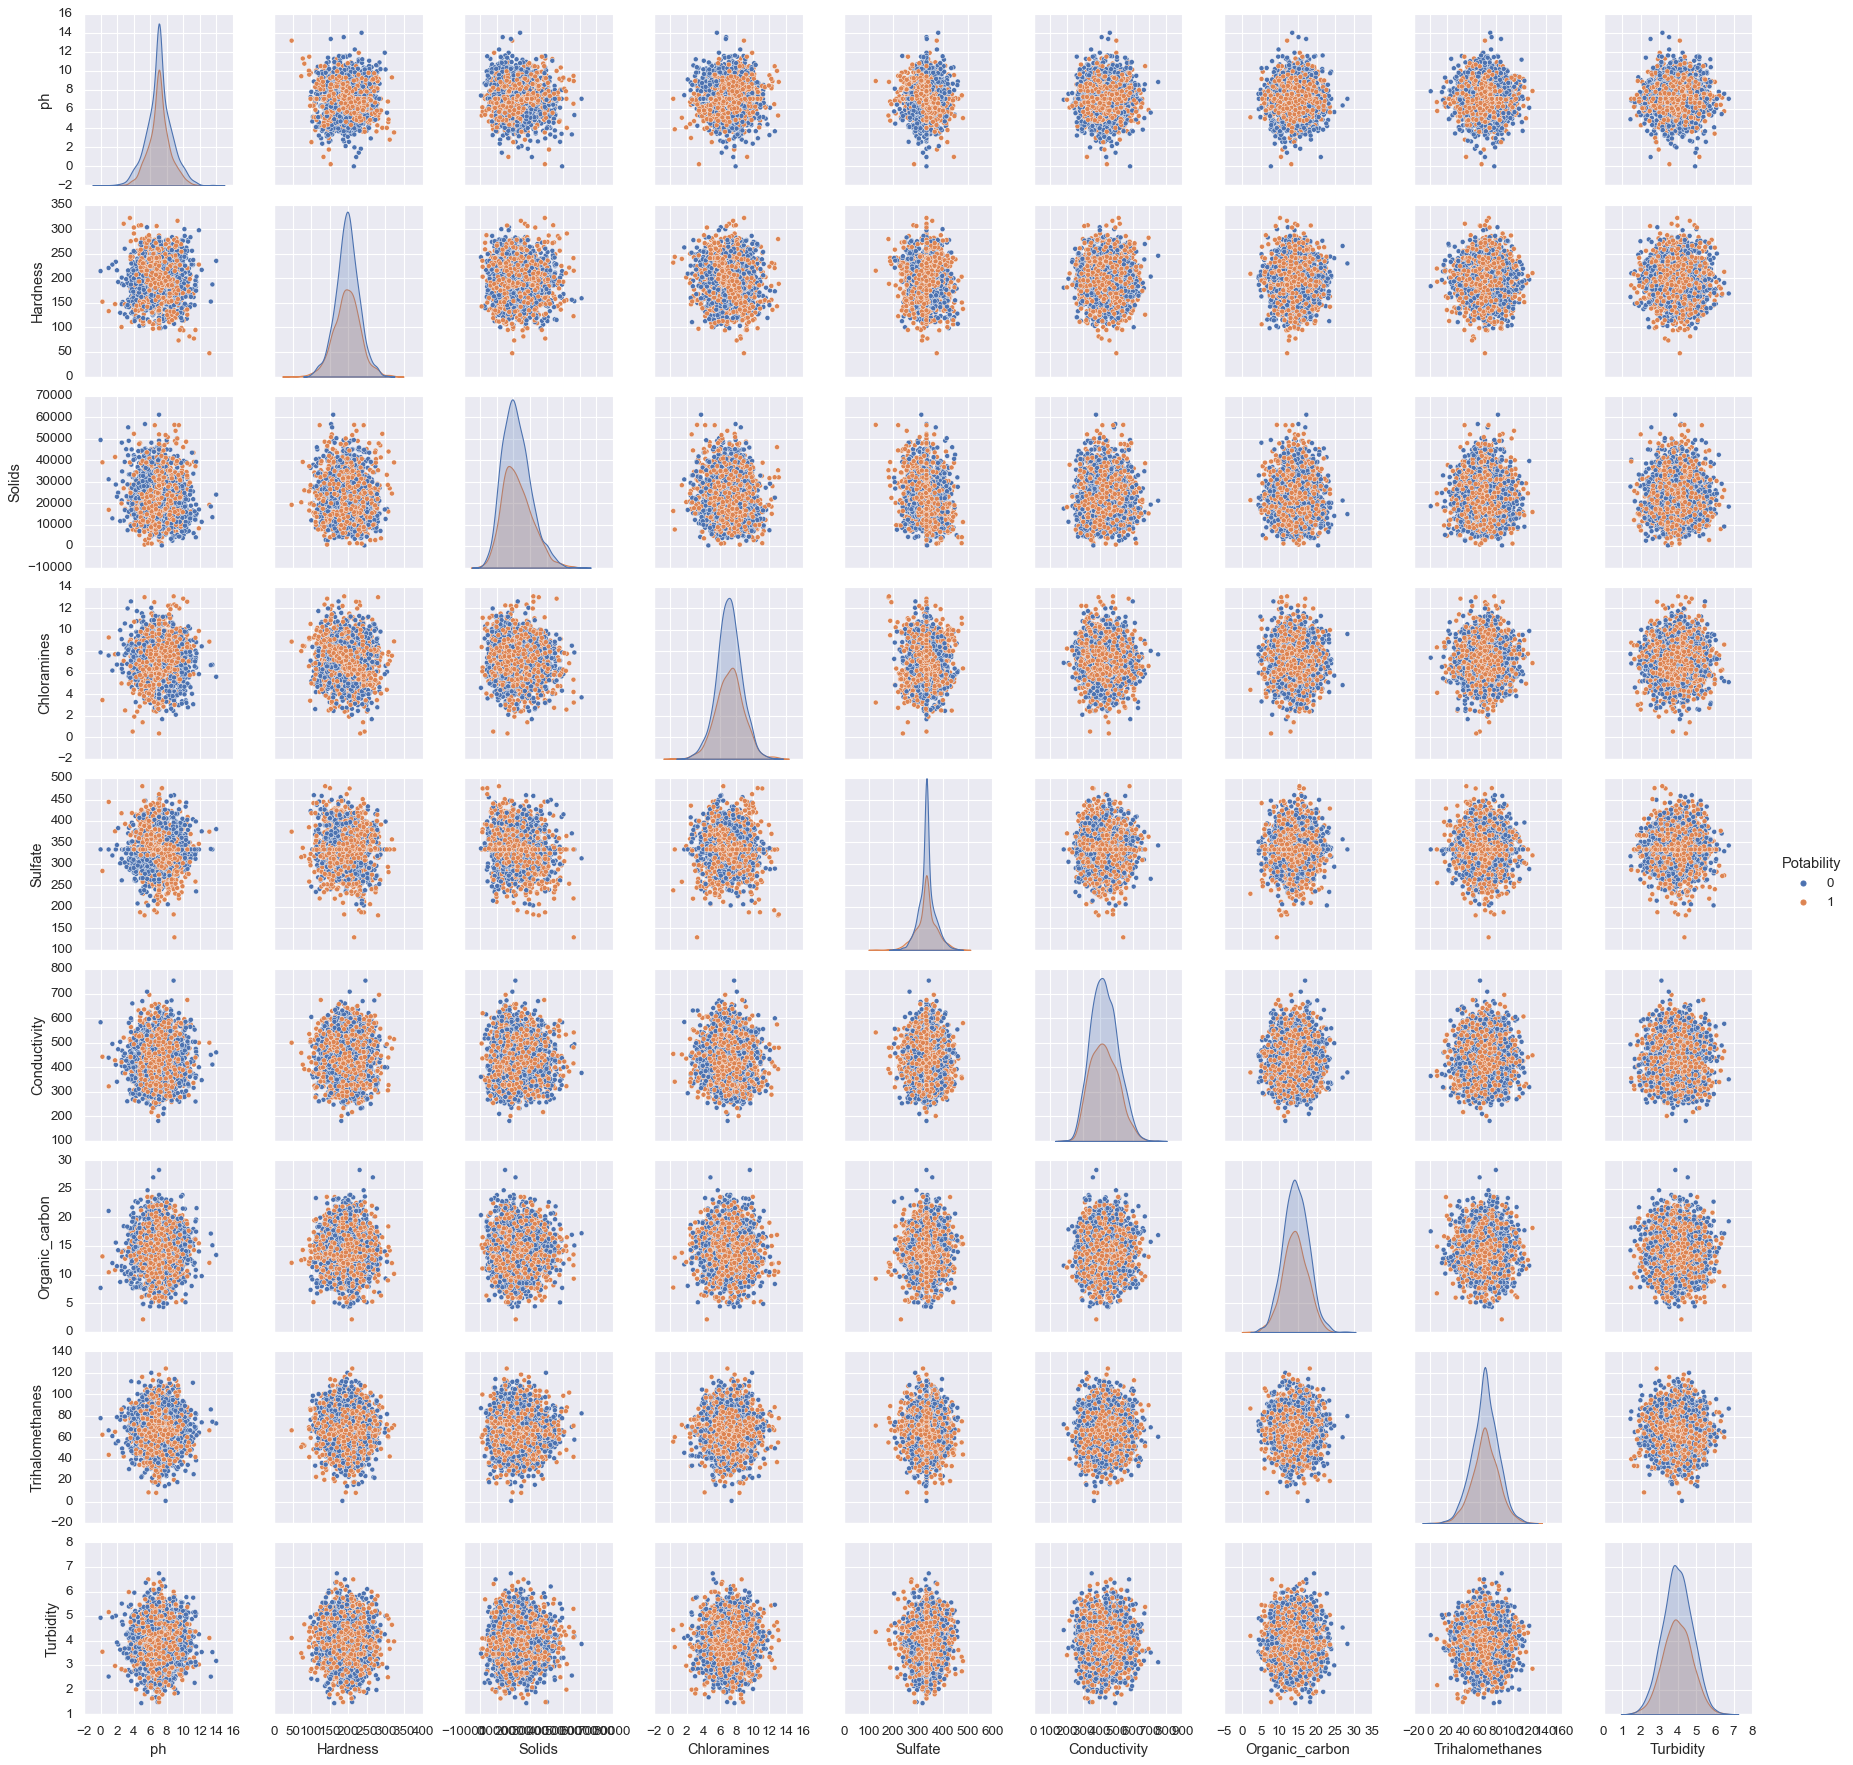

In [217]:
sns.pairplot(data=water_quality,hue="Potability")

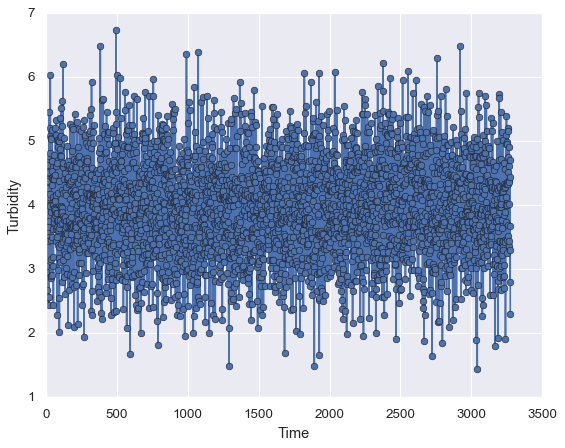

In [218]:
plt.plot(water_quality['Turbidity'], '-o')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.show()

### _6. Histogram, boxplot, KDEplots, Stacked bar chart,..._

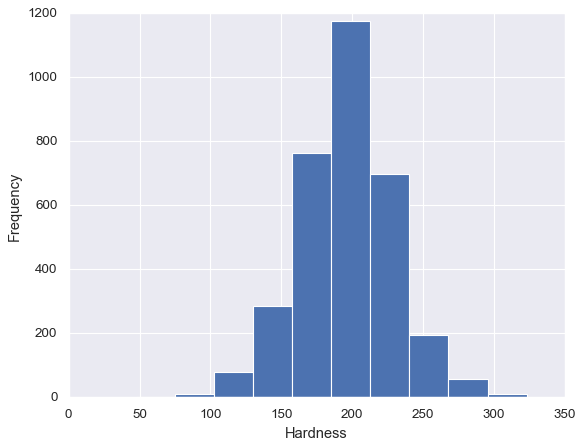

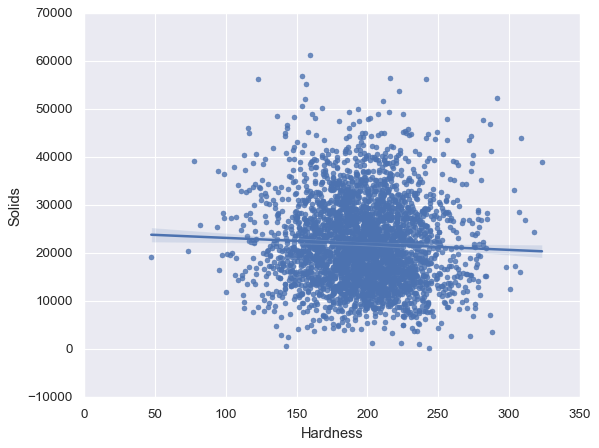

<Axes: xlabel='Potability', ylabel='Hardness'>

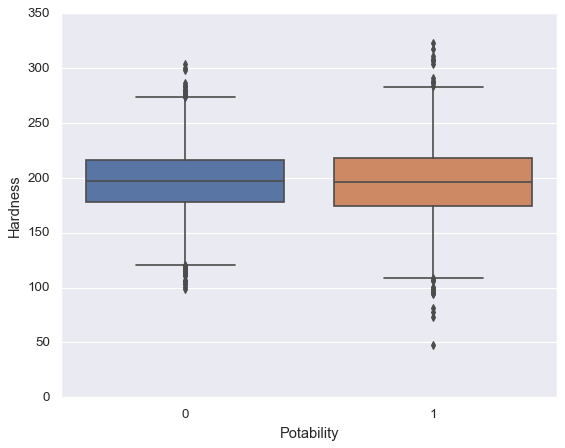

In [219]:
plt.hist(water_quality['Hardness'], bins=10)
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.show()

sns.regplot(x='Hardness', y='Solids', data=water_quality)
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

sns.boxplot(x='Potability', y='Hardness', data=water_quality)

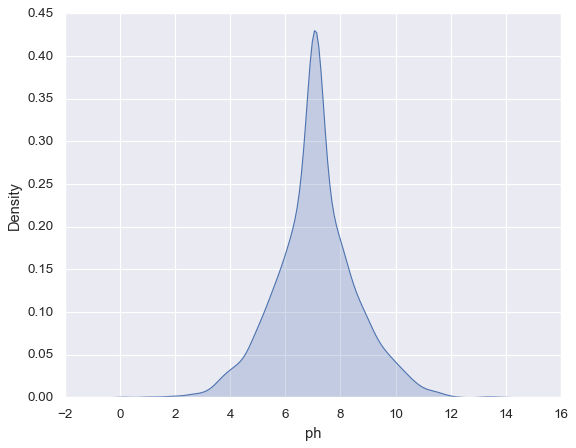

In [220]:
sns.kdeplot(water_quality['ph'], fill=True)
plt.xlabel('ph')
plt.show()

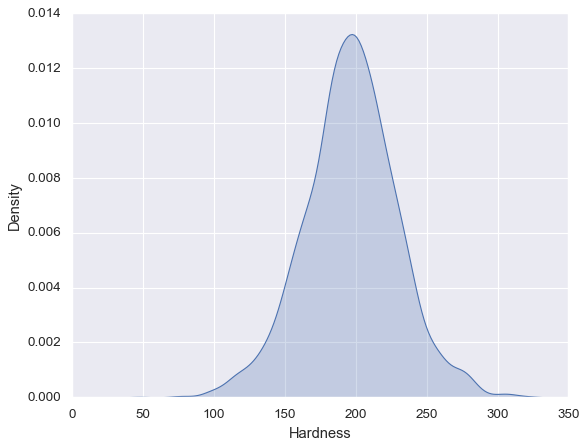

In [221]:
sns.kdeplot(water_quality['Hardness'], fill=True)
plt.xlabel('Hardness')
plt.show()

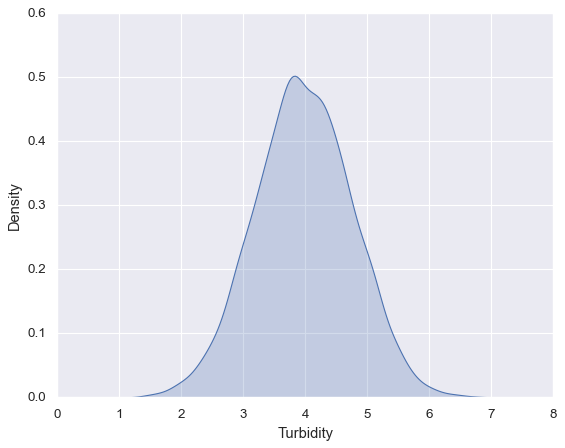

In [222]:
sns.kdeplot(water_quality['Turbidity'], fill=True)
plt.xlabel('Turbidity')
plt.show()

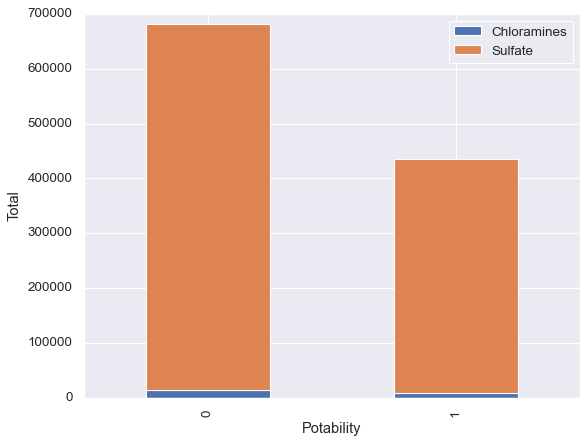

In [223]:
counts = water_quality.groupby(['Potability'])[['Chloramines', 'Sulfate']].sum()
counts.plot(kind='bar', stacked=True)
plt.xlabel('Potability')
plt.ylabel('Total')
plt.show()

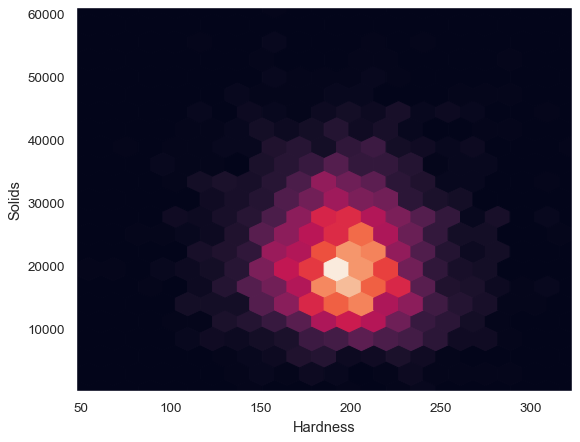

In [224]:
plt.hexbin(x=water_quality['Hardness'], y=water_quality['Solids'], gridsize=20)
plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()
#Hexbin plot

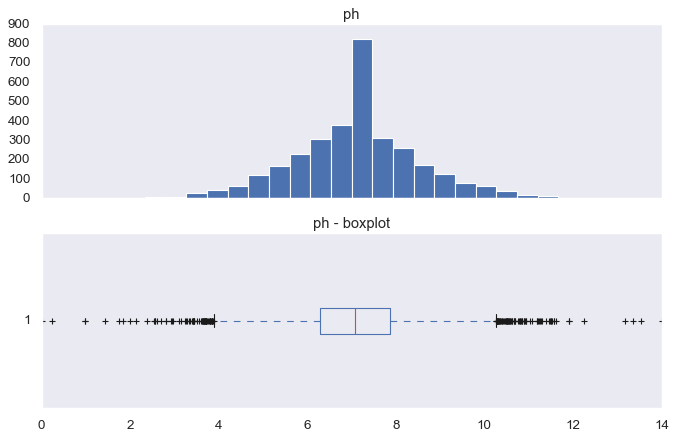

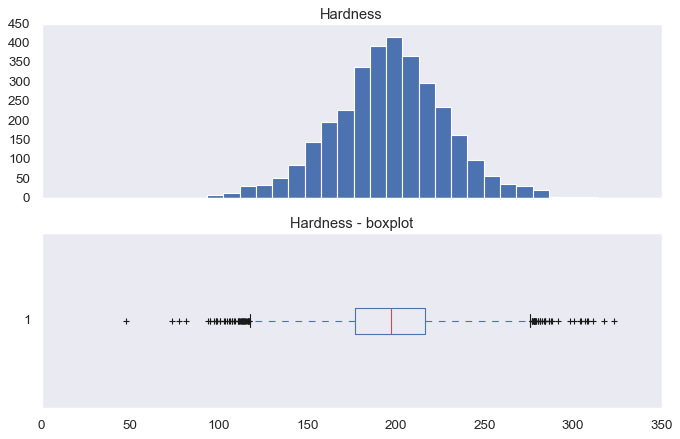

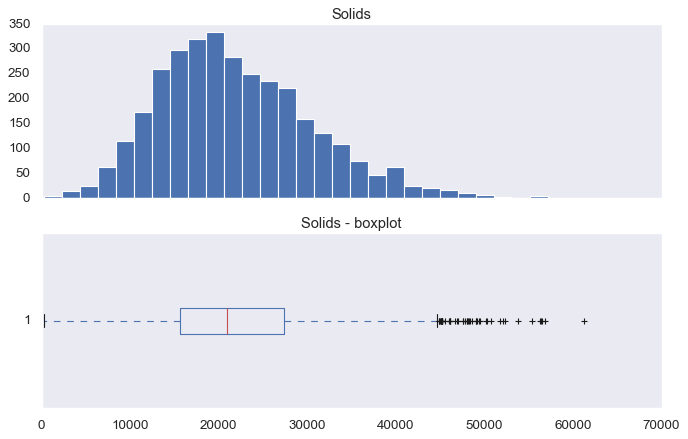

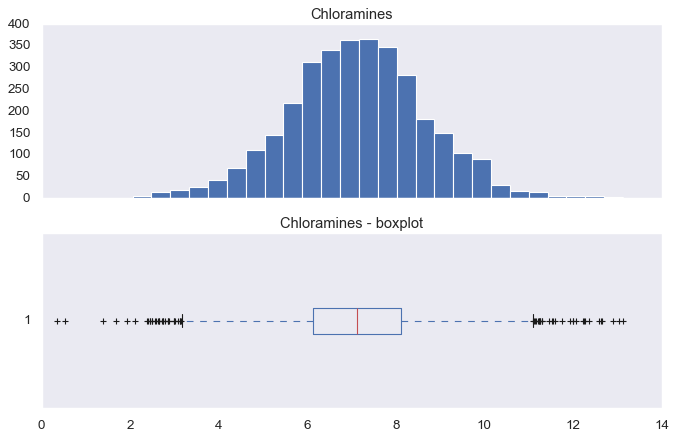

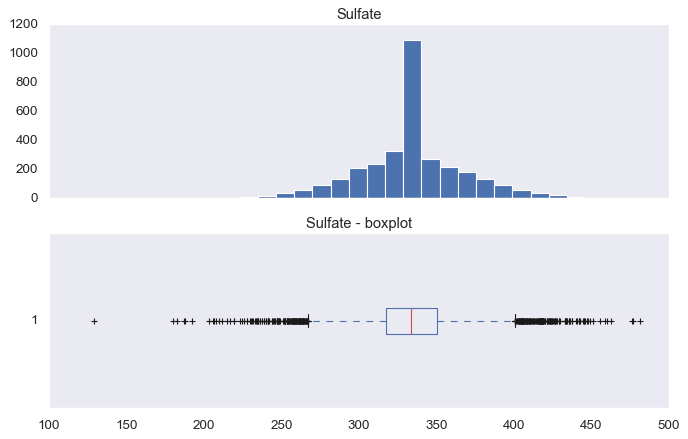

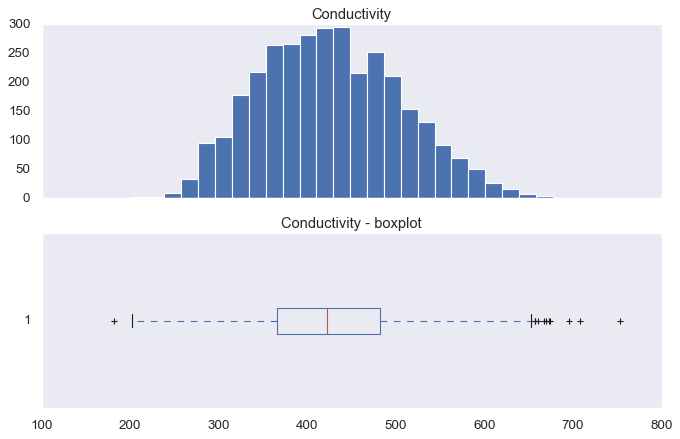

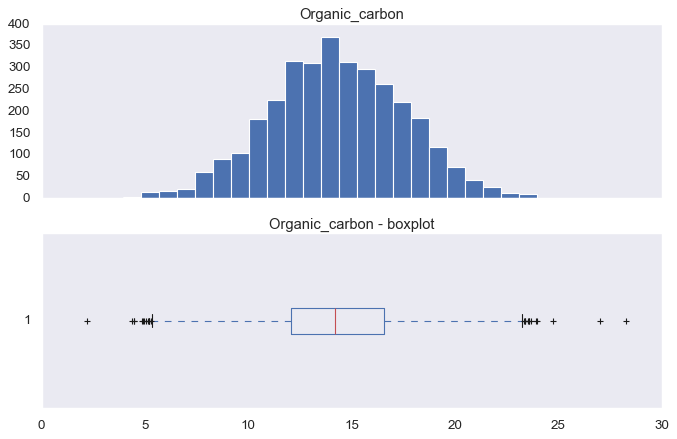

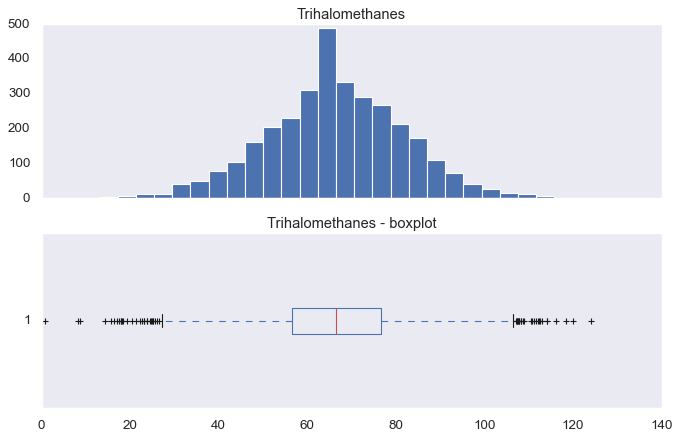

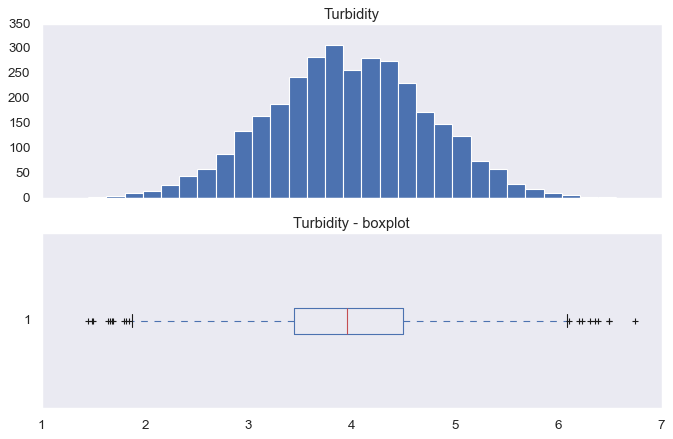

In [225]:
water_quality_data = water_quality.drop(['Potability'], axis = 1)
# plot distribution of numerical features
for f in water_quality_data:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax1.hist(water_quality_data[f], bins=30)
    ax1.grid()
    ax1.set_title(f)
    # for boxplot we need to remove the NaNs first
    feature_wo_nan = water_quality_data[~np.isnan(water_quality_data[f])][f]
    ax2.boxplot(feature_wo_nan, vert=False)
    ax2.grid()
    ax2.set_title(f + ' - boxplot')
    plt.show()

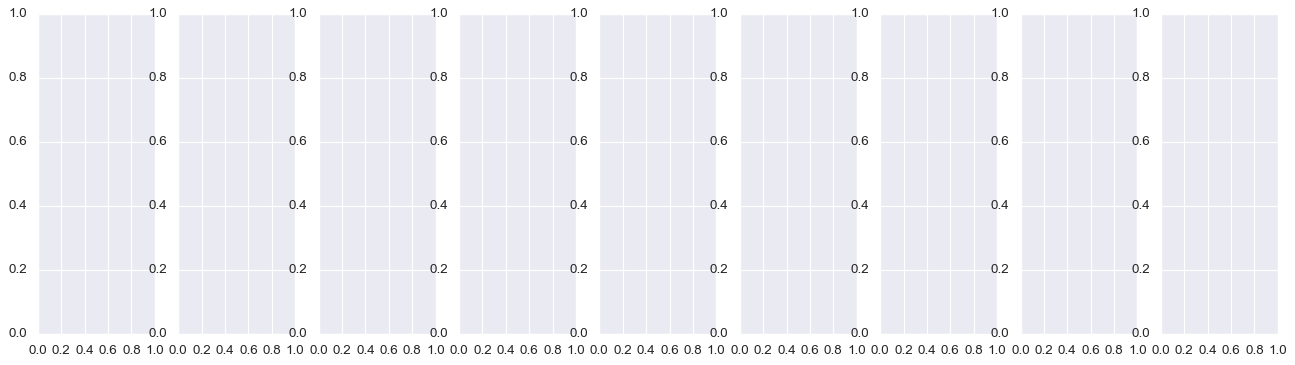

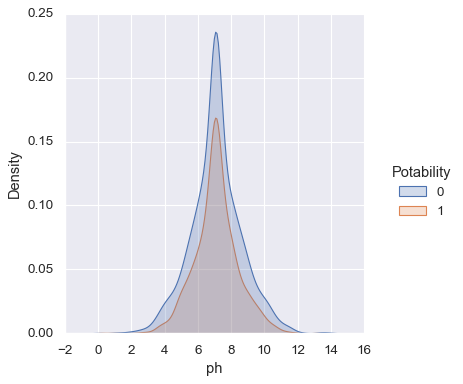

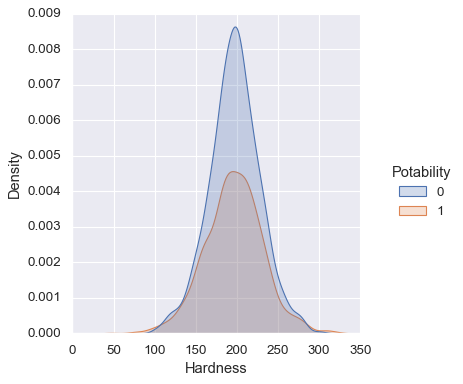

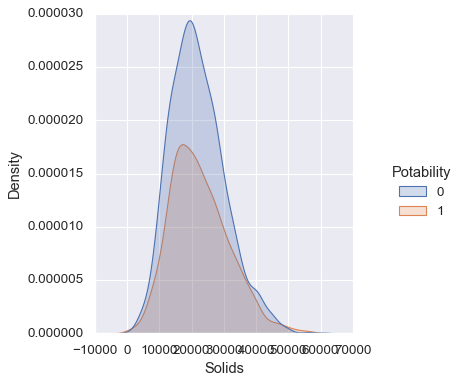

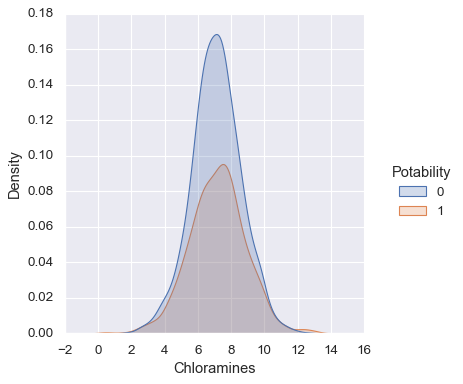

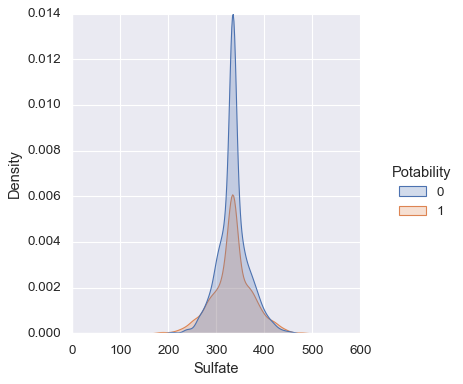

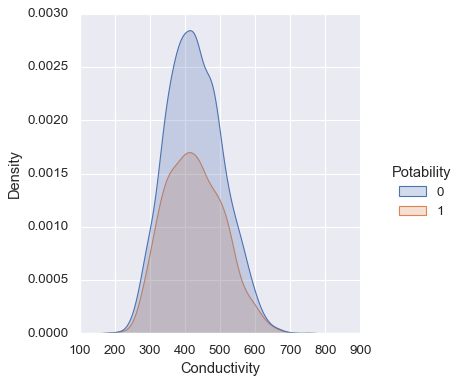

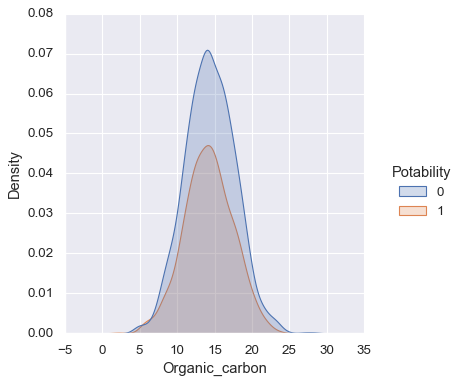

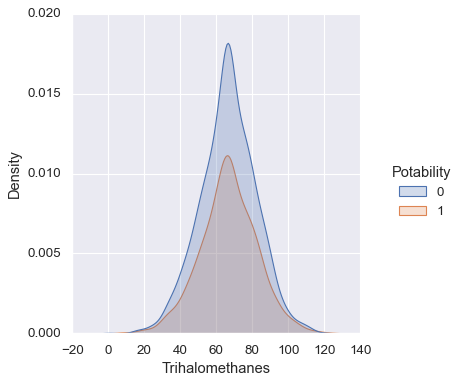

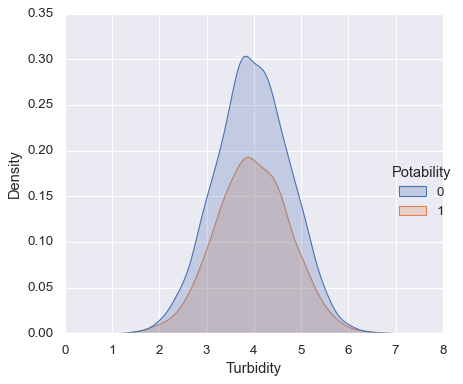

In [226]:
#KDE Graphs Highlighting Potability in the Distribution of Water Quality Attributes
# Create subplots with a specified number of rows and columns
fig, axs = plt.subplots(1, 9, figsize=(20, 5))

# Plot each distribution on a separate subplot
sns.displot(water_quality, x="ph", hue="Potability", kind="kde", fill=True, ax=axs[0])
sns.displot(water_quality, x="Hardness", hue="Potability", kind="kde", fill=True, ax=axs[1])
sns.displot(water_quality, x="Solids", hue="Potability", kind="kde", fill=True, ax=axs[2])
sns.displot(water_quality, x="Chloramines", hue="Potability", kind="kde", fill=True, ax=axs[3])
sns.displot(water_quality, x="Sulfate", hue="Potability", kind="kde", fill=True, ax=axs[4])
sns.displot(water_quality, x="Conductivity", hue="Potability", kind="kde", fill=True, ax=axs[5])
sns.displot(water_quality, x="Organic_carbon", hue="Potability", kind="kde", fill=True, ax=axs[6])
sns.displot(water_quality, x="Trihalomethanes", hue="Potability", kind="kde", fill=True, ax=axs[7])
sns.displot(water_quality, x="Turbidity", hue="Potability", kind="kde", fill=True, ax=axs[8])

# Adjust layout
plt.tight_layout()
plt.show()

<a id='Heading2'></a>


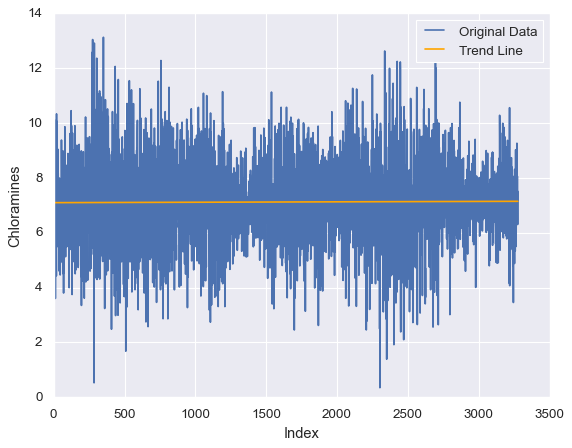

In [227]:
# Create an index column representing the order of observations
water_quality['Index'] = np.arange(len(water_quality))

# Fit a linear regression model to the data
X = water_quality[['Index']]
y = water_quality['Chloramines']

model = LinearRegression()
model.fit(X, y)

# Calculate the trend line
trend_line = model.predict(X)

# Plot the original data and the trend line
plt.plot(water_quality['Index'], water_quality['Chloramines'], label='Original Data')
plt.plot(water_quality['Index'], trend_line, label='Trend Line', color='orange')
plt.xlabel('Index')
plt.ylabel('Chloramines')
plt.legend()
plt.show()

# Drop the Index column if it's no longer needed
water_quality.drop(columns='Index', inplace=True)

<a id='Heading2'></a>
### Distribution of pH values in potable and non-potable water

Text(0, 180, 'recommended limit of pH from\n 6.5 to 8.5.')

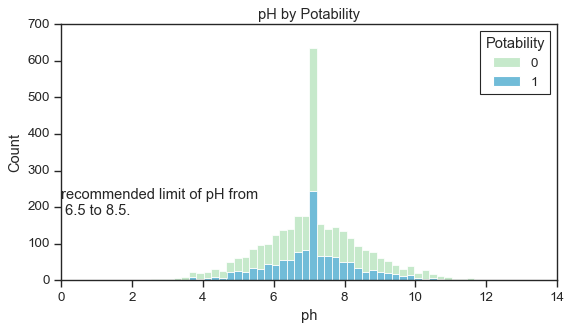

In [228]:
sns.set_style('ticks')
plt.figure(figsize=(8,4))
sns.histplot(x='ph', data=water_quality, hue='Potability', multiple='stack', palette='GnBu')
plt.title('pH by Potability')
plt.text(x=0, y=180, s='recommended limit of pH from\n 6.5 to 8.5.')

### Distribution of water hardness values by potability and its relevance to drinking water quality

Text(60, 210, 'Hardness is mainly caused by\ncalcium and magnesium salts')

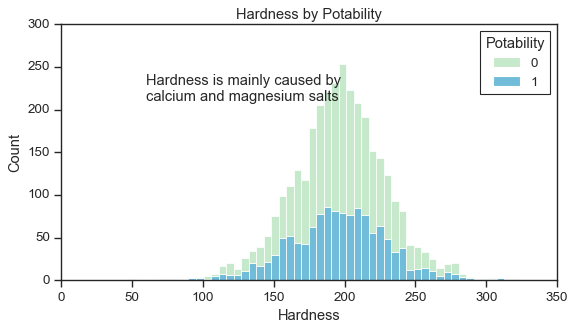

In [229]:
sns.set_style('ticks')
plt.figure(figsize=(8,4))
sns.histplot(x='Hardness', data=water_quality, hue='Potability', multiple='stack', palette='GnBu')
plt.title('Hardness by Potability')
plt.text(x=60, y=210, s='Hardness is mainly caused by\ncalcium and magnesium salts')

### Distribution of total dissolved solids by potability and its relevance to drinking water quality

Text(34000, 180, 'Total dissolved solids desirable limit\n is between 500 mg/L and 1000 mg/L')

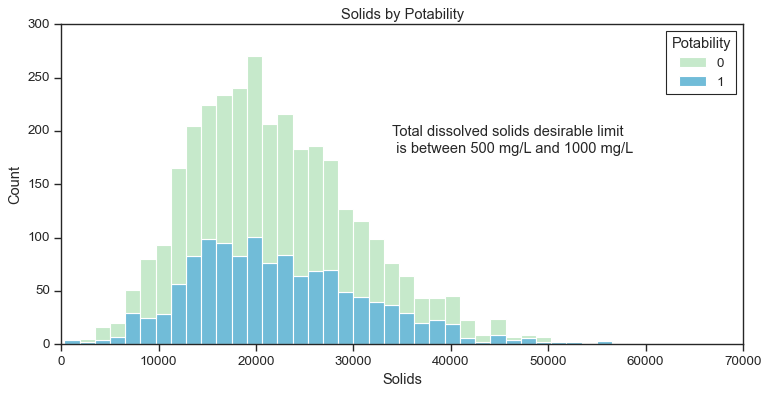

In [230]:
sns.set_style('ticks')
plt.figure(figsize=(11,5))
sns.histplot(x='Solids', data=water_quality, hue='Potability', multiple='stack', palette='GnBu')
plt.title('Solids by Potability')
plt.text(x=34000, y=180, s='Total dissolved solids desirable limit\n is between 500 mg/L and 1000 mg/L')

### Distribution of Turbidity in Water Samples by Potability Status

Text(1.4, 180, 'turbidity depends on the quantity\n of solid matter present\n in the suspended state')

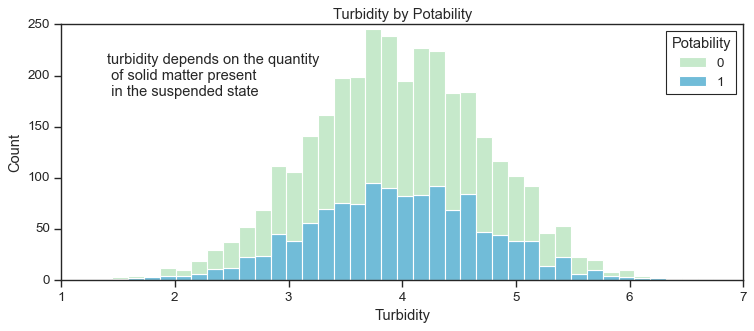

In [231]:
sns.set_style('ticks')
plt.figure(figsize=(11,4))
sns.histplot(x='Turbidity', data=water_quality, hue='Potability', multiple='stack', palette='GnBu')
plt.title('Turbidity by Potability')
plt.text(x=1.4, y=180, s='turbidity depends on the quantity\n of solid matter present\n in the suspended state')

### Box Plots to visualize outliers

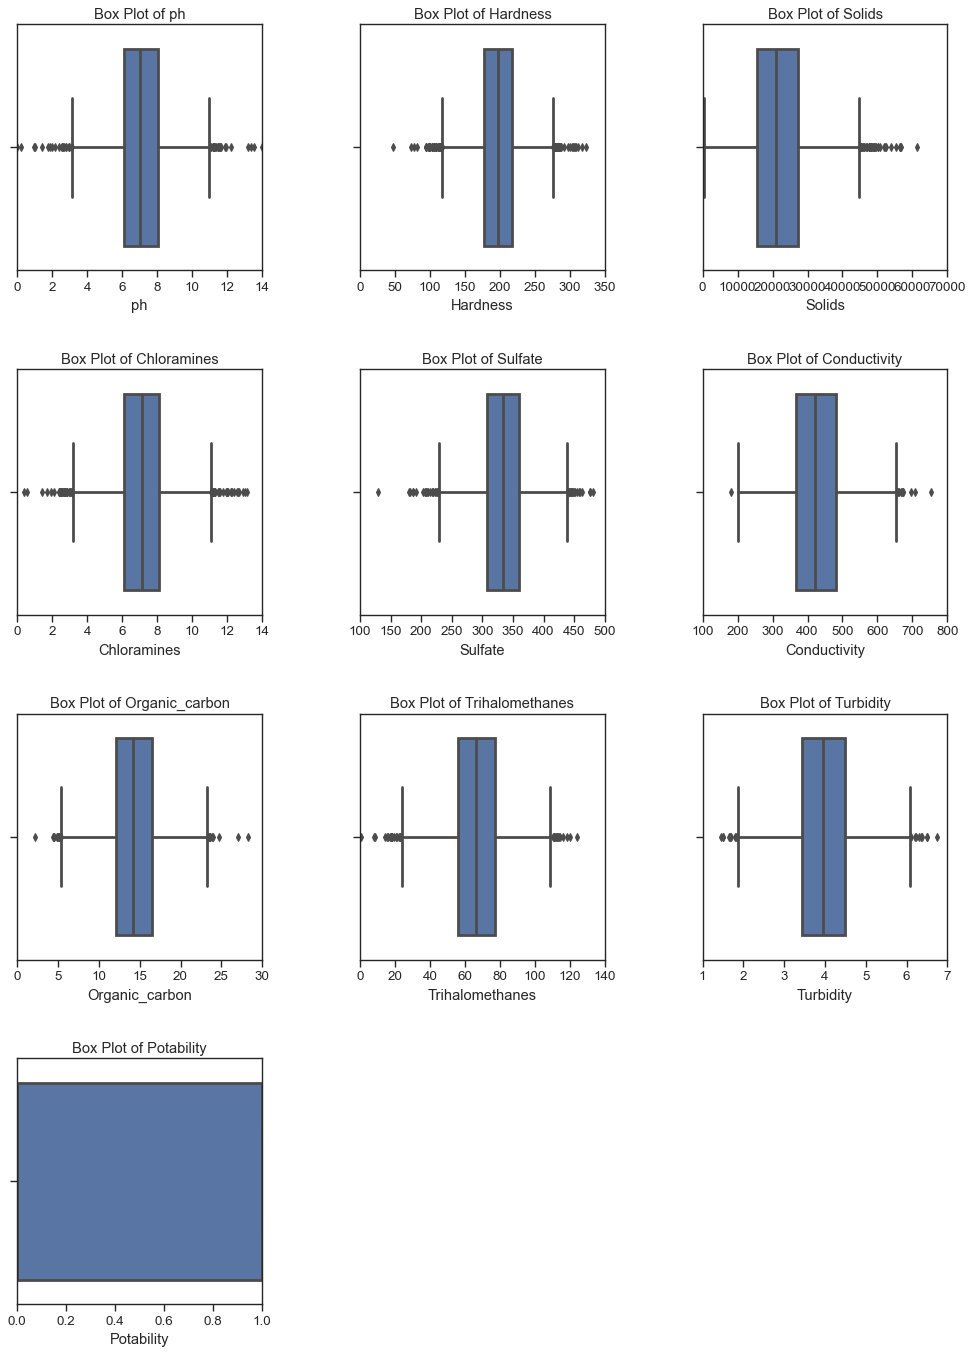

In [232]:
# Assuming water_quality_data is your DataFrame and is already loaded
water_quality_data = pd.read_csv('water_potability.csv')

# Calculate the number of rows needed based on the number of columns
# This ensures all plots fit into the grid, with 3 plots per row.
num_cols = 3
num_rows = len(water_quality_data.columns) // num_cols + (len(water_quality_data.columns) % num_cols > 0)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Flatten the array of axes, for easy iterating
axs = axs.flatten()

# Plot each boxplot in the grid
for i, col in enumerate(water_quality_data.columns):
    sns.set_style("whitegrid")
    sns.boxplot(x=water_quality_data[col], linewidth=2.5, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

# Hide any empty subplots (in case the number of plots isn't a multiple of 3)
for ax in axs[i+1:]:
    ax.set_visible(False)

plt.show()



### Scatter Plot of pH Levels vs. Chloramines Concentration in Water Samples

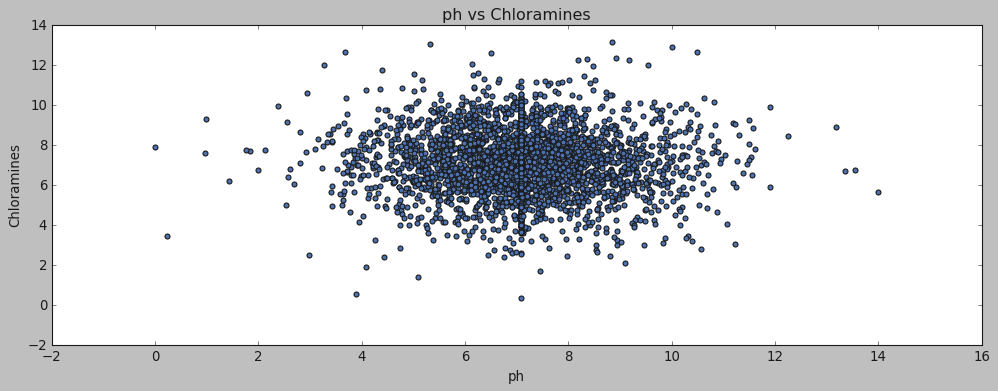

In [233]:
plt.style.use('classic')

plt.figure(figsize=(15,5))
plt.scatter(water_quality['ph'],water_quality['Chloramines'])

plt.xlabel('ph')
plt.ylabel('Chloramines')
plt.title('ph vs Chloramines')
plt.show()

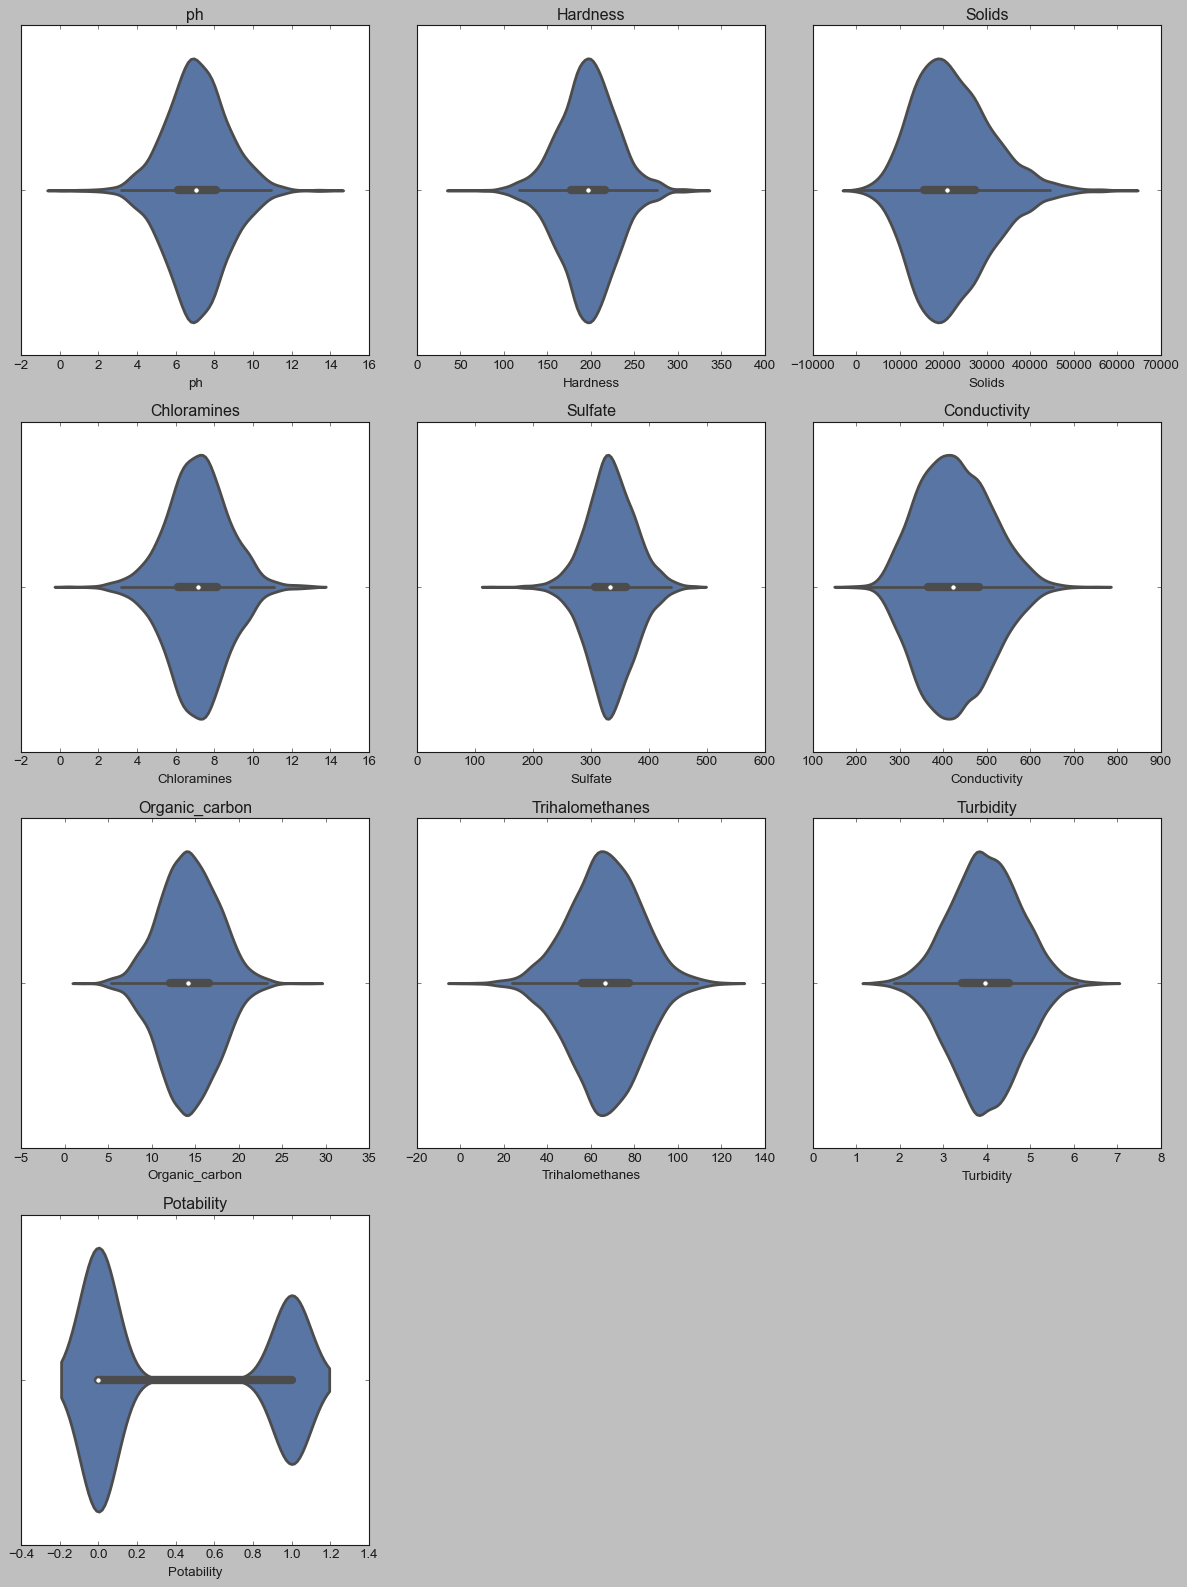

In [234]:
# Assuming water_quality_data is your DataFrame and is already loaded
water_quality_data = pd.read_csv('water_potability.csv')

# Determine the number of rows needed for 3 columns, given the total number of features
num_features = len(water_quality_data.columns)
num_rows = (num_features + 2) // 3  # Add 2 for rounding up integer division

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Flatten the axes array for easier access
axs = axs.flatten()

# Iterate over the columns and create a violin plot for each
for i, col in enumerate(water_quality_data.columns):
    sns.set_style("whitegrid")
    sns.violinplot(x=water_quality_data[col], linewidth=2.5, ax=axs[i])
    axs[i].set_title(col)

# In case the total number of plots is not a multiple of 3, hide the remaining axes
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


### Histograms of Water Quality Parameters in the Dataset

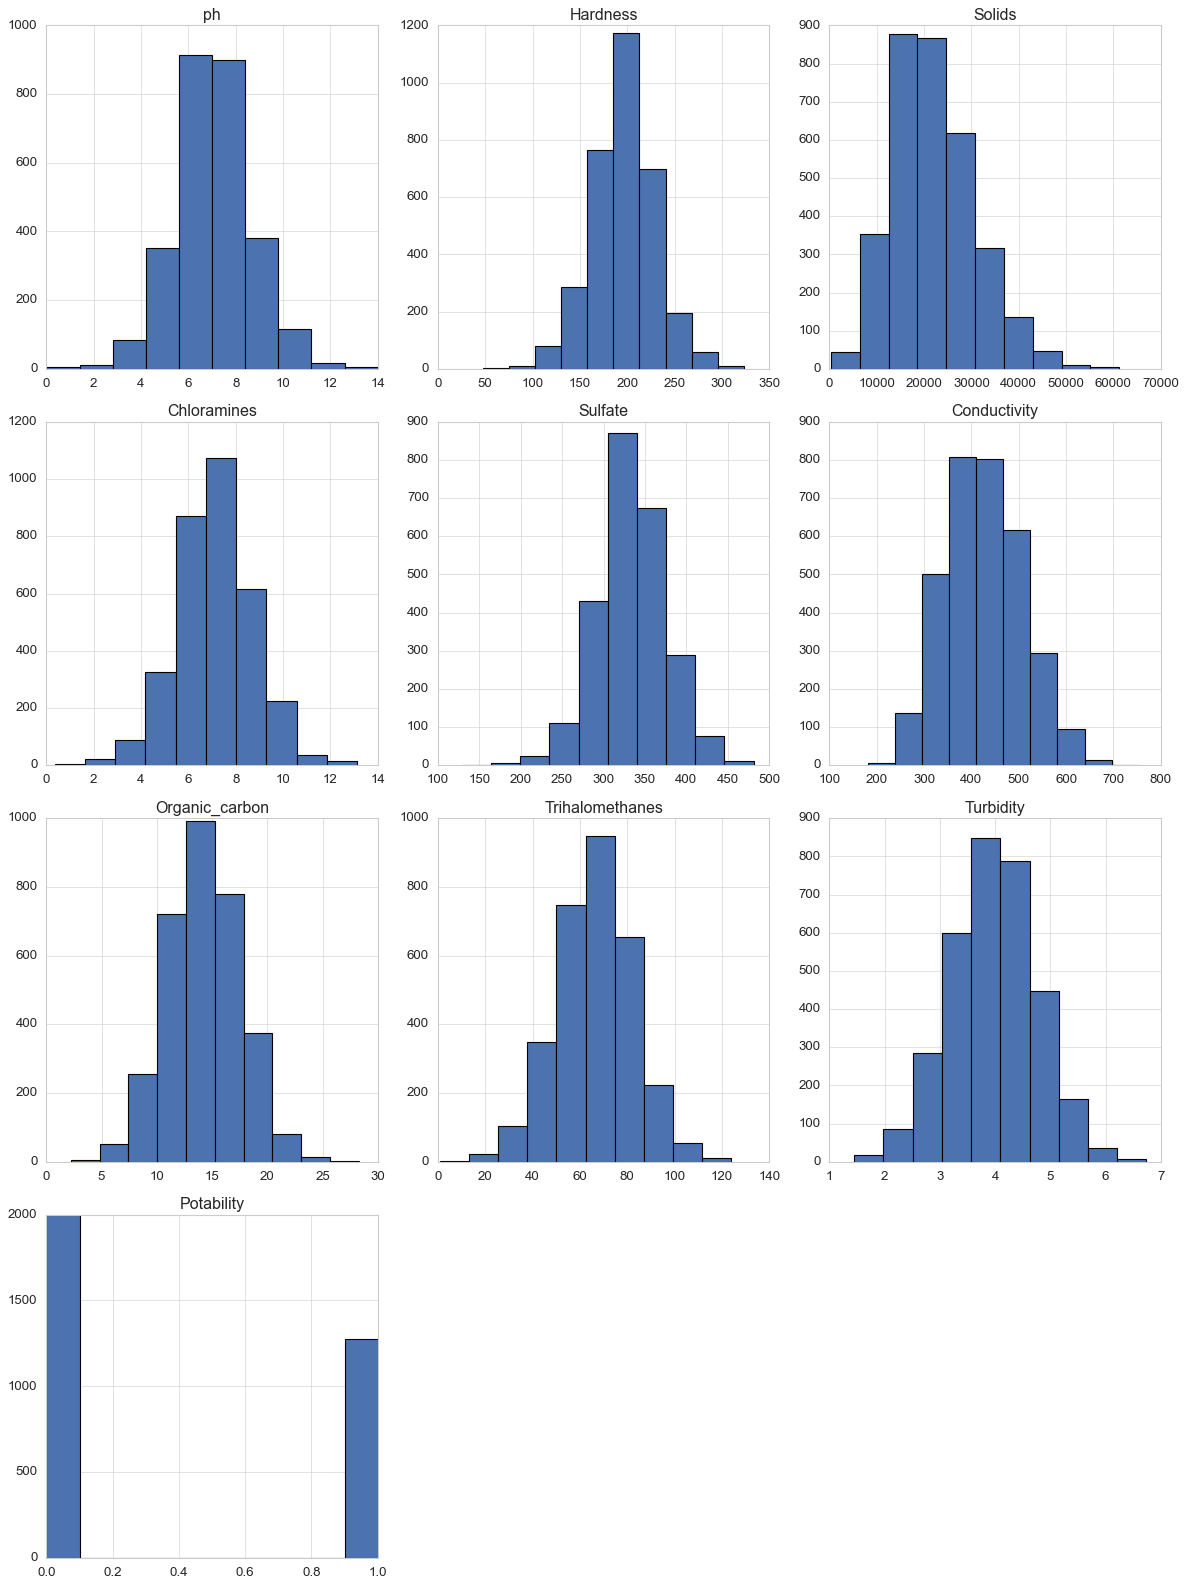

In [235]:
#With Scrolling
# Assuming water_quality_data is your DataFrame and is already loaded
water_quality_data = pd.read_csv('water_potability.csv')

# Number of columns in the DataFrame
n_cols = len(water_quality_data.columns)
# Number of rows needed for the subplot grid, with 3 columns per row
n_rows = n_cols // 3 + (n_cols % 3 > 0)

# Create a figure and a set of subplots
fig, axs = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))  # Adjust figure size as needed

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate over the columns of the DataFrame and their corresponding axes
for i, c in enumerate(water_quality_data.columns):
    axs[i].hist(water_quality_data[c].dropna(), edgecolor='black')  # Use dropna() to exclude NaN values
    axs[i].set_title(c)

# If the number of plots is not a multiple of 3, hide the remaining axes
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


### Comparing Mean Values of Water Quality Features Between Potable and Non-Potable Water Samples Using Independent T-Tests

In [236]:
potable = water_quality[water_quality['Potability'] == 1]
non_potable = water_quality[water_quality['Potability'] == 0]

# List of feature names
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Initialize a list to store test results
test_results = []

# Perform t-tests
for feature in features:
    t_stat, p_value = ttest_ind(potable[feature].dropna(), non_potable[feature].dropna(), nan_policy='omit')
    # Append results as dictionaries to the list
    test_results.append({'Feature': feature, 'T-statistic': f"{t_stat:.4f}", 'p-value': f"{p_value:.4f}"})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(test_results)

# Define a function to color significant p-values
def color_significant(val):
    color = 'red' if float(val) < 0.05 else 'white'
    return f'color: {color}'

# Apply styling
styled_results = results_df.style.applymap(color_significant, subset=['p-value'])\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'white')]}])\
    .set_properties(**{'background-color': 'lavender', 'color': 'darkblue'}, subset=['Feature'])\
    .set_caption("T-test Results for Water Quality Features")

styled_results



#### STEP VII. Reflection, Conclusion and Author.

* _Reflection - Comparative Analysis of Excel and Python for Data Analysis and Descriptive Statistics: Insights and Future Directions_

While working on Assignment 1 and Assignment 2, I have gained insights into the differences between using Excel and Python for analyzing data and performing descriptive statistics. Both tools have their advantages and limitations that become apparent when working on various tasks.

Excel provides a user-friendly interface that enables fast and effortless manipulation, visualization, and computation of basic descriptive statistics without requiring programming expertise. For those not familiar with programming, Excel's built-in functions and features offer a great option, especially for straightforward tasks that require swift results. However, it is also possible to compute values manually without relying on built-in functions. Excel's visual presentation tools facilitate the creation of well-organized workbooks, and it offers a range of graph types that can effectively display data.

Python, on the other hand, offers more flexibility and power when it comes to data analysis, cleaning, and processing. With libraries like pandas, numpy, and matplotlib, Python enables more advanced statistical analyses and data visualizations. Additionally, Python allows for the automation of repetitive tasks and the handling of larger datasets that might be challenging for Excel.

The choice between Excel and Python depends on the task at hand and the user's proficiency in each tool. For simpler tasks, quick analyses, or when working with non-programmers, Excel might be the preferred choice. However, for more complex data manipulation, larger datasets, or when more advanced statistical methods are required, Python would be the better option.

If I had to redo this assignment, I would focus on exploring even more advanced statistical techniques in Python and comparing their implementation with Excel's capabilities. This would provide a deeper understanding of the strengths and limitations of each tool in various scenarios.

Regarding gaps in my knowledge, I acknowledge that there are many statistical methods and Python libraries I have yet to explore. To enhance my skills, I would like to learn more about time series analysis, machine learning techniques, and statistical modelling. Additionally, I would benefit from improving my programming abilities, such as writing more efficient code and learning to use additional Python libraries relevant to data analysis.

* _Conclusion_

The dataset contains both potable (39.0%) and non-potable (61.0%) water samples in a balanced distribution. The KDE plots demonstrate that most features' distributions for potable and non-potable water are similar, except for Chloramines, Sulfate, and Trihalomethanes, which may help distinguish the portability.

However, neither the correlation nor the covariance matrices show strong relationships between most features and water potability. The highest correlation identified is between Solids and Conductivity (0.41). Different data visualizations, including pair plots, histograms, box plots, and violin plots, provide insights into feature distributions and potential outliers. Some features have relatively normal distributions (e.g., pH, Turbidity), while others are skewed (e.g., Solids, Organic Carbon). Box plots depict potential outliers for features such as Hardness, Solids, and Conductivity.

According to the T-test results, there are no significant differences between the means of potable and non-potable water samples for most features since the p-values are relatively high. Based on this analysis, there is no strong relationship between the provided features and water potability. The features might require enhancements to accurately predict water potability. Incorporating additional water quality parameters or more representative features could improve the prediction accuracy of a model built using this dataset.

* _Author_

##### _Author: Israel Lwamba Butalele_
##### _Student Number: 220069129_
##### _Date: 10 April 2024_
##### _GitHub url:_ https://github.com/B7ISRAEL-LWAMBA/Learning_From_Data_Assignment2.git
##### _Source: Kaggle_

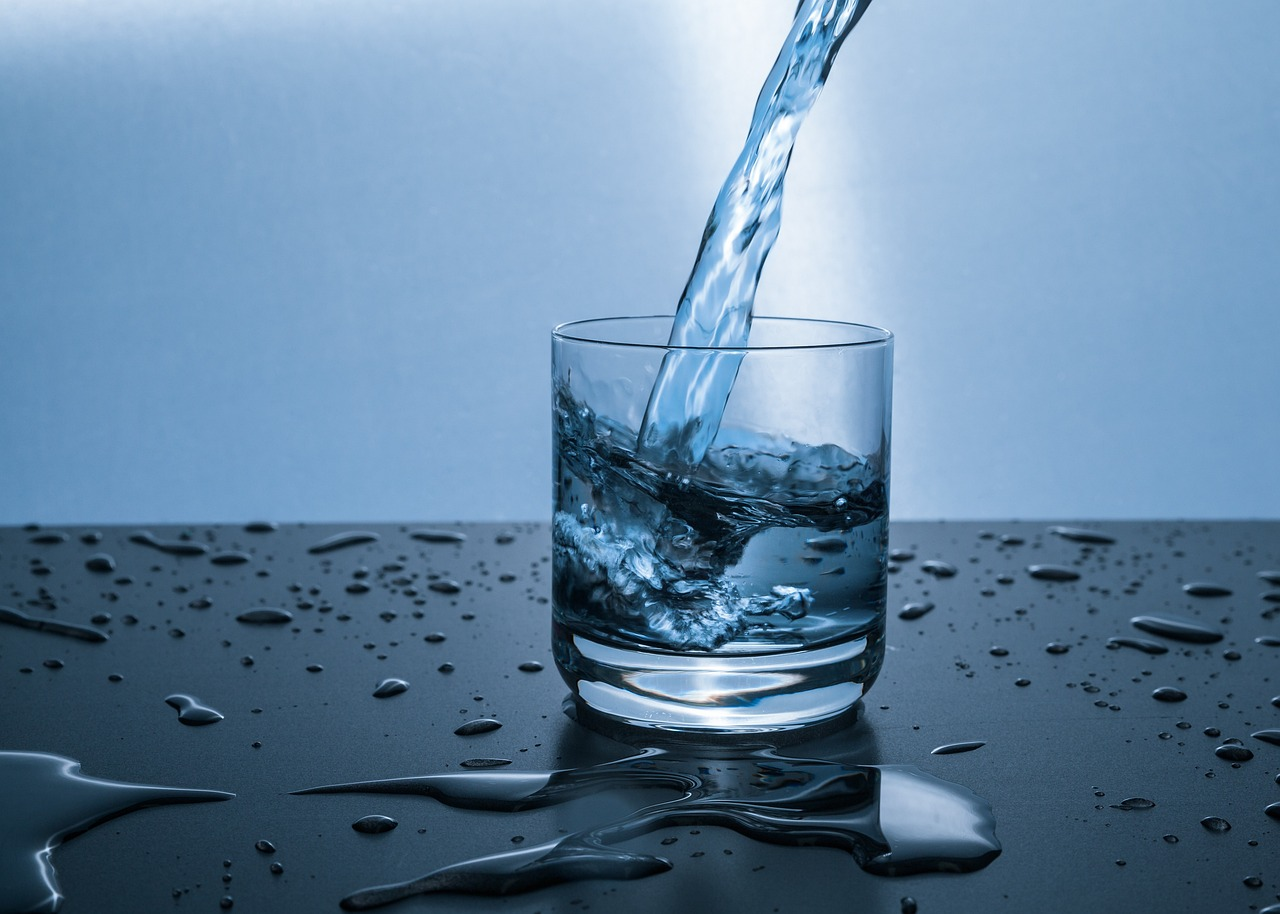